# Telecom Churn Case Study Hackathon
## PCA with Logistic Regression and Random Forest

Predict whether a particular customer will switch to another telecom provider or not (Customer Churn).

### Group Details:

##### Team members:
1. Sunil Jadhav (Group Facilitator)
2. Trupti Dhumal

### Problem Statement:

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

For many incumbent operators, retaining high profitable customers is the number one business
goal. To reduce customer churn, telecom companies need to predict which customers are at high risk of churn. In this project, you will analyze customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn.

In this competition, your goal is to build a machine learning model that is able to predict churning customers based on the features provided for their usage.

##### Goal:

Predict if a customer will churn, given the ~170 columns containing customer behavior, usage patterns, payment patterns, and other features that might be relevant. Your target variable is "churn_probability".

Note: Make sure your accuracy is greater than the sample submission that is present in the leaderboard

##### Metric:

Submissions are evaluated on Classification Accuracy between the value of the predicted value and the actual value of churn for each of the customers.

Accuracy score formula = (TP + TN) / (TP + TN + FP + FN)

The public leaderboard is going to rank your submission against other users while the competition is active, however, once the competition is ended, the final ranks will be calculated on the private leaderboard.

## Steps followed (As per CRISP-DM Framework):

1. Business Understanding
2. Data Understanding and Exploration
3. Data Cleaning and Preparation
4. Model Building
5. Model Evaluation
6. Model Deployment

## Step 1: Business Understanding

**Customer behaviour during churn:**

Customers usually do not decide to switch to another competitor instantly, but rather over a
period of time (this is especially applicable to high-value customers). In churn prediction, we
assume that there are three phases of customer lifecycle :

1. <u>The ‘good’ phase:</u> In this phase, the customer is happy with the service and behaves as usual.

2. <u>The ‘action’ phase:</u> The customer experience starts to sore in this phase, for e.g. he/she gets a compelling offer from a competitor, faces unjust charges, becomes unhappy with service quality etc. In this phase, the customer usually shows different behaviour than the ‘good’ months. It is crucial to identify high-churn-risk customers in this phase, since some corrective actions can be taken at this point (such as matching the competitor’s offer/improving the service quality etc.)

3. <u>The ‘churn’ phase:</u> In this phase, the customer is said to have churned. In this case, since you are working over a four-month window, the first two months are the ‘good’ phase, the third month is the ‘action’ phase, while the fourth month (September) is the ‘churn’ phase.

## Step 2: Data Understanding and Exploration

### 2.1.  Importing Libraries and Data

In [1]:
# Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import re
import os

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, precision_score, recall_score

# Importing required packages for visualization
from IPython.display import Image  
from six import StringIO  
from sklearn.tree import export_graphviz
import pydotplus, graphviz

# hide warnings
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
# Importing all datasets

telecom_data = pd.read_csv("train.csv")
unseen_data = pd.read_csv("test.csv")
sample_output = pd.read_csv("sample.csv")
data_dict = pd.read_csv("data_dictionary.csv")

### 2.2.  Understanding structure of the dataframes

In [3]:
pd.set_option('display.max_columns', None)   # This command releases restriction on max columns display

#### [1] "train.csv" => telecom_data

In [4]:
print(telecom_data.shape)

(69999, 172)


In [5]:
telecom_data.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.00,0.0,0.0,0.00,0.0,0.00,2.23,0.00,0.28,5.29,16.04,2.33,0.00,0.00,0.00,0.00,0.00,0.00,7.53,16.04,2.61,46.34,124.38,1.01,18.75,80.61,0.0,0.00,0.0,0.0,0.0,0.0,0.0,65.09,204.99,1.01,0.0,0.0,0.0,8.20,0.63,0.00,0.38,0.0,0.0,81.21,221.68,3.63,2.43,3.68,7.79,0.83,21.08,16.91,0.00,0.00,0.00,3.26,24.76,24.71,0.00,7.61,0.21,7.46,19.96,14.96,0.0,0.0,0.0,0.0,0.0,0.0,7.46,27.58,15.18,11.84,53.04,40.56,0.0,0.0,0.66,0.0,0.0,0.0,1.11,0.69,0.00,3,2,2,77,65,10,65,65,10,6/22/2014,7/10/2014,8/24/2014,65,65,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00,0.00,0.0,0.00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1958,0.0,0.0,0.0,0
1,1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22.01,29.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,30.73,31.66,0.00,0.0,0.0,0.00,30.73,31.66,1.68,19.09,10.53,1.41,18.68,11.09,0.35,1.66,3.40,3.44,39.44,25.03,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,3.44,39.44,25.04,0.0,0.0,0.01,0.0,0.0,0.0,0.00,0.00,0.00,3,4,5,0,145,50,0,145,50,6/12/2014,7/10/2014,8/26/2014,0,0,0,NaN,7/8/2014,NaN,NaN,1.0,NaN,NaN,145.0,NaN,NaN,0.0,NaN,NaN,1.0,NaN,Na

In [6]:
telecom_data.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 172 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    id                        int64  
 1    circle_id                 int64  
 2    loc_og_t2o_mou            float64
 3    std_og_t2o_mou            float64
 4    loc_ic_t2o_mou            float64
 5    last_date_of_month_6      object 
 6    last_date_of_month_7      object 
 7    last_date_of_month_8      object 
 8    arpu_6                    float64
 9    arpu_7                    float64
 10   arpu_8                    float64
 11   onnet_mou_6               float64
 12   onnet_mou_7               float64
 13   onnet_mou_8               float64
 14   offnet_mou_6              float64
 15   offnet_mou_7              float64
 16   offnet_mou_8              float64
 17   roam_ic_mou_6             float64
 18   roam_ic_mou_7             float64
 19   roam_ic_mou_8             float64
 20   roam

In [7]:
telecom_data.describe()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
count,69999.000000,69999.0,69297.0,69297.0,69297.0,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.0,67312.0,66296.0,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.0,67312.0,66296.0,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,69999.000000,69999.000000

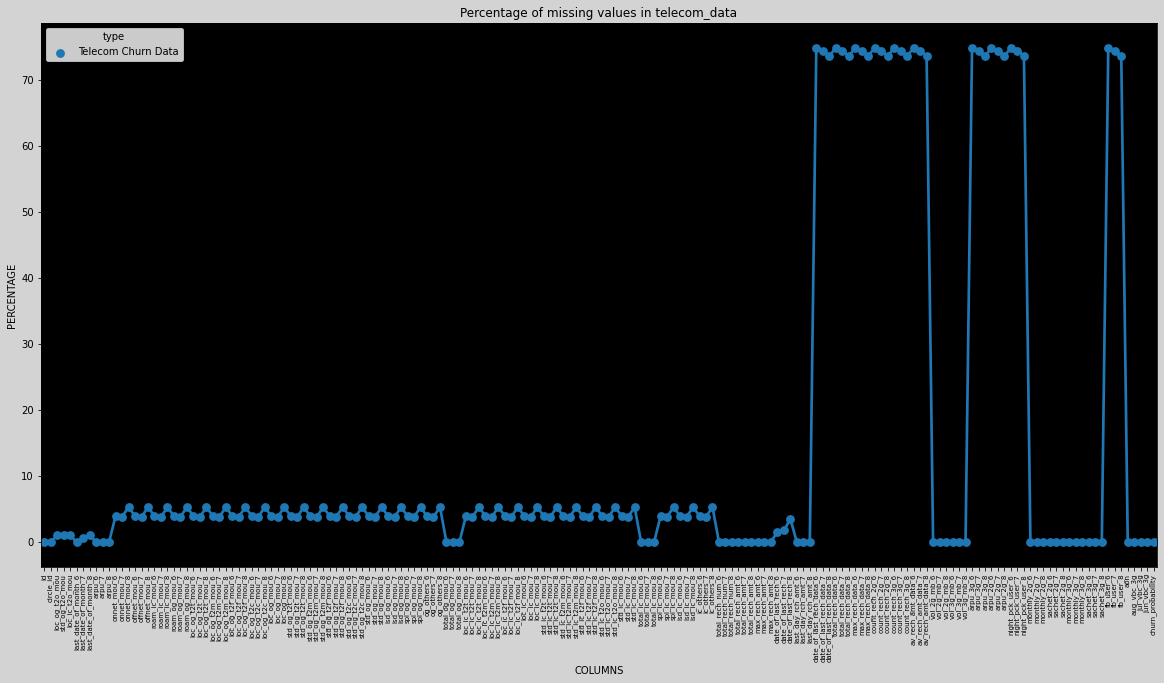

In [8]:
# Display percentage of missing values in the dataframe

fig = plt.figure(figsize=(20,10))
miss_telecom_data = pd.DataFrame((telecom_data.isnull().sum())*100/telecom_data.shape[0]).reset_index()
miss_telecom_data["type"] = "Telecom Churn Data"
ax = sns.pointplot("index",0,data=miss_telecom_data,hue="type")
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of missing values in telecom_data")
plt.ylabel("PERCENTAGE")
plt.xlabel("COLUMNS")
ax.set_facecolor("k")
fig.set_facecolor("lightgrey")
plt.show()

#### Need to check columns below as they have zero or missing values: 

In [9]:
def missing_zero_values_table(telecom_data):
        zero_val = (telecom_data == 0.00).astype(int).sum(axis=0)
        mis_val = telecom_data.isnull().sum()
        mis_val_percent = 100 * telecom_data.isnull().sum() / len(telecom_data)
        mz_table = pd.concat([zero_val, mis_val, mis_val_percent], axis=1)
        mz_table = mz_table.rename(
        columns = {0 : 'Zero Values', 1 : 'Missing Values', 2 : '% of Total Values'})
        mz_table['Total Zero Missing Values'] = mz_table['Zero Values'] + mz_table['Missing Values']
        mz_table['% Total Zero Missing Values'] = 100 * mz_table['Total Zero Missing Values'] / len(telecom_data)
        mz_table['Data Type'] = telecom_data.dtypes
        mz_table = mz_table[
            mz_table.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("The dataframe has " + str(telecom_data.shape[1]) + " columns and " + str(telecom_data.shape[0]) + " Rows.\n"      
            "There are " + str(mz_table.shape[0]) +
              " columns that have missing values.")
#        mz_table.to_excel('D:/sampledata/missing_and_zero_values.xlsx', freeze_panes=(1,0), index = False)
        return mz_table

missing_zero_values_table(telecom_data)

The dataframe has 172 columns and 69999 Rows.
There are 125 columns that have missing values.


,Zero Values,Missing Values,% of Total Values,Total Zero Missing Values,% Total Zero Missing Values,Data Type
max_rech_data_6,0,52431,74.9,52431,74.9,float64
fb_user_6,1470,52431,74.9,53901,77.0,float64
date_of_last_rech_data_6,0,52431,74.9,52431,74.9,object
av_rech_amt_data_6,0,52431,74.9,52431,74.9,float64
night_pck_user_6,17124,52431,74.9,69555,99.4,float64
...,...,...,...,...,...,...
last_date_of_month_8,0,733,1.0,733,1.0,object
std_og_t2o_mou,69297,702,1.0,69999,100.0,float64
loc_ic_t2o_mou,69297,702,1.0,69999,100.0,float64
loc_og_t2o_mou,69297,702,1.0,69999,100.0,float64


#### [2] "train.csv" => unseen_data

In [10]:
print(unseen_data.shape)

(30000, 171)


In [11]:
unseen_data.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
0,69999,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,91.882,65.330,64.445,31.78,20.23,23.11,60.16,32.16,34.83,0.00,0.00,0.00,0.00,0.00,0.00,24.88,20.23,21.06,18.13,10.89,8.36,0.00,13.58,0.00,0.0,0.00,0.03,43.01,44.71,29.43,6.90,0.00,2.05,42.03,7.68,26.43,0.0,0.0,0.0,0.0,0.0,0.0,48.93,7.68,28.48,0.0,0.0,0.0,0.00,0.00,0.03,0.0,0.0,0.0,91.94,52.39,57.94,30.33,37.56,21.98,10.21,4.59,9.53,0.26,0.00,0.00,40.81,42.16,31.51,0.00,0.00,0.00,0.36,1.04,4.34,0.0,0.0,0.00,0.0,0.0,0.0,0.36,1.04,4.34,41.73,43.56,36.26,0.54,0.34,0.39,0.00,0.00,0.00,0.0,0.0,0.00,5,5,4,103,90,60,50,30,30,6/21/2014,7/26/2014,8/24/2014,30,30,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1692,0.00,0.00,0.00
1,70000,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,414.168,515.568,360.868,75.51,41.21,19.84,474.34,621.84,394.94,0.00,0.00,0.00,0.00,0.00,0.00,75.51,41.21,19.84,473.61,598.08,377.26,0.73,0.00,0.00,0.0,0.00,0.00,549.86,639.29,397.11,0.00,0.00,0.00,0.00,23.76,17.68,0.0,0.0,0.0,0.0,0.0,0.0,0.00,23.76,17.68,0.0,0.0,0.8,0.00,0.00,0.00,0.0,0.0,0.0,549.86,663.06,415.59,19.99,26.95,2.61,160.19,122.29,184.81,1.49,0.00,0.00,181.69,149.24,187.43,0.00,0.00,0.00,0.00,12.51,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,12.51,0.00,296.33,339.64,281.66,0.00,0.00,0.00,114.63,177.88,94.23,0.0,0.0,0.00,5,4,5,500,500,500,250,250,250,6/19/2014,7/16/2014,8/24/2014,250,0,0,NaN,NaN,Na

In [12]:
unseen_data.describe()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
count,30000.000000,30000.0,29684.0,29684.0,29684.0,30000.000000,30000.000000,30000.000000,28831.000000,28828.000000,28325.000000,28831.000000,28828.000000,28325.000000,28831.000000,28828.000000,28325.000000,28831.000000,28828.000000,28325.000000,28831.000000,28828.000000,28325.000000,28831.000000,28828.000000,28325.000000,28831.000000,28828.000000,28325.000000,28831.000000,28828.000000,28325.000000,28831.000000,28828.000000,28325.000000,28831.000000,28828.000000,28325.000000,28831.000000,28828.000000,28325.000000,28831.000000,28828.000000,28325.000000,28831.0,28828.0,28325.0,28831.000000,28828.000000,28325.000000,28831.000000,28828.000000,28325.000000,28831.000000,28828.000000,28325.000000,28831.000000,28828.000000,28325.000000,30000.000000,30000.000000,30000.000000,28831.000000,28828.000000,28325.000000,28831.000000,28828.000000,28325.000000,28831.000000,28828.000000,28325.000000,28831.000000,28828.000000,28325.000000,28831.000000,28828.000000,28325.000000,28831.000000,28828.000000,28325.000000,28831.000000,28828.000000,28325.000000,28831.0,28828.0,28325.0,28831.000000,28828.000000,28325.000000,30000.000000,30000.000000,30000.000000,28831.000000,28828.000000,28325.000000,28831.000000,28828.000000,28325.000000,28831.000000,28828.000000,28325.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,7585.000000,7706.000000,7922.000000,7585.000000,7706.000000,7922.000000,7585.000000,7706.000000,7922.000000,7585.000000,7706.000000,7922.000000,7585.000000,7706.000000,7922.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.

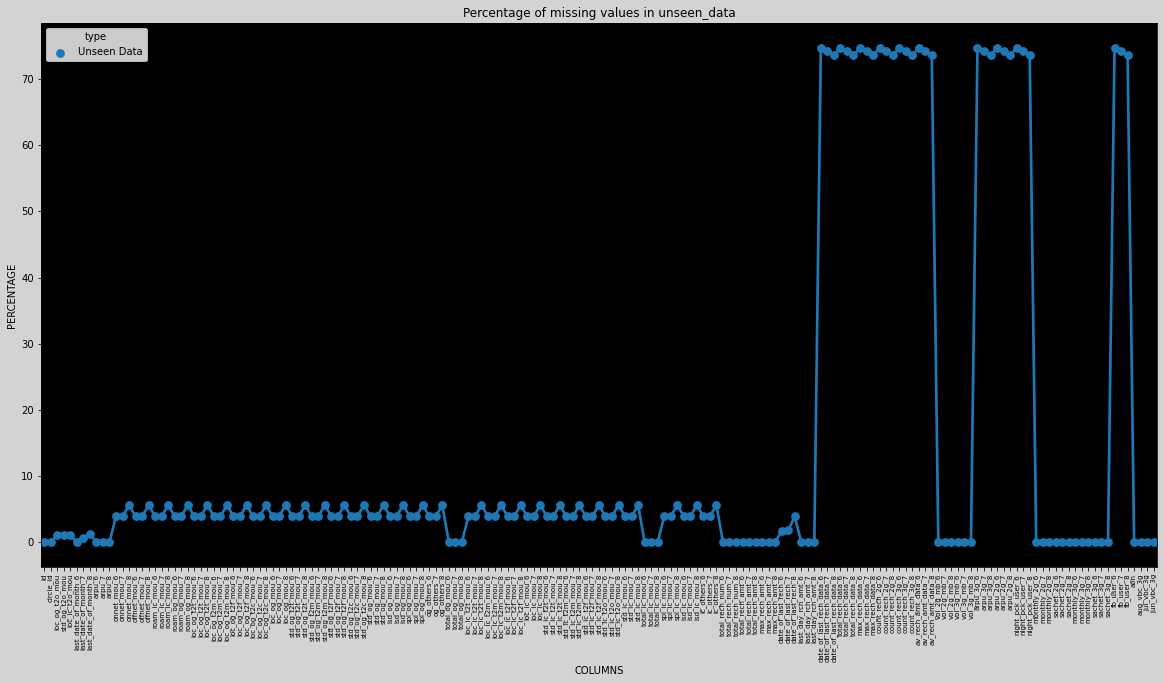

In [13]:
# Display percentage of missing values in the unseen_data dataframe

fig = plt.figure(figsize=(20,10))
miss_unseen_data = pd.DataFrame((unseen_data.isnull().sum())*100/unseen_data.shape[0]).reset_index()
miss_unseen_data["type"] = "Unseen Data"
ax = sns.pointplot("index",0,data=miss_unseen_data,hue="type")
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of missing values in unseen_data")
plt.ylabel("PERCENTAGE")
plt.xlabel("COLUMNS")
ax.set_facecolor("k")
fig.set_facecolor("lightgrey")
plt.show()

#### Need to check columns below as they have zero or missing values: 

In [14]:
def missing_zero_values_table(unseen_data):
        zero_val = (unseen_data == 0.00).astype(int).sum(axis=0)
        mis_val = unseen_data.isnull().sum()
        mis_val_percent = 100 * unseen_data.isnull().sum() / len(unseen_data)
        mz_table = pd.concat([zero_val, mis_val, mis_val_percent], axis=1)
        mz_table = mz_table.rename(
        columns = {0 : 'Zero Values', 1 : 'Missing Values', 2 : '% of Total Values'})
        mz_table['Total Zero Missing Values'] = mz_table['Zero Values'] + mz_table['Missing Values']
        mz_table['% Total Zero Missing Values'] = 100 * mz_table['Total Zero Missing Values'] / len(unseen_data)
        mz_table['Data Type'] = unseen_data.dtypes
        mz_table = mz_table[
            mz_table.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("The dataframe has " + str(unseen_data.shape[1]) + " columns and " + str(unseen_data.shape[0]) + " Rows.\n"      
            "There are " + str(mz_table.shape[0]) +
              " columns that have missing values.")
#        mz_table.to_excel('D:/sampledata/missing_and_zero_values.xlsx', freeze_panes=(1,0), index = False)
        return mz_table

missing_zero_values_table(unseen_data)

The dataframe has 171 columns and 30000 Rows.
There are 125 columns that have missing values.


,Zero Values,Missing Values,% of Total Values,Total Zero Missing Values,% Total Zero Missing Values,Data Type
count_rech_3g_6,4768,22415,74.7,27183,90.6,float64
count_rech_2g_6,1775,22415,74.7,24190,80.6,float64
fb_user_6,683,22415,74.7,23098,77.0,float64
date_of_last_rech_data_6,0,22415,74.7,22415,74.7,object
av_rech_amt_data_6,0,22415,74.7,22415,74.7,float64
...,...,...,...,...,...,...
last_date_of_month_8,0,367,1.2,367,1.2,object
std_og_t2o_mou,29684,316,1.1,30000,100.0,float64
loc_ic_t2o_mou,29684,316,1.1,30000,100.0,float64
loc_og_t2o_mou,29684,316,1.1,30000,100.0,float64


#### [3] "sample.csv" => sample_output

In [15]:
print(sample_output.shape)

(30000, 2)


In [16]:
sample_output.head()

,id,churn_probability
0,69999,0
1,70000,0
2,70001,0
3,70002,0
4,70003,0


#### [4] "data_dictionary.csv" => data_dict

In [17]:
print(data_dict.shape)

(36, 2)


In [18]:
data_dict

,Acronyms,Description
0,CIRCLE_ID,Telecom circle area to which the customer belo...
1,LOC,Local calls within same telecom circle
2,STD,STD calls outside the calling circle
3,IC,Incoming calls
4,OG,Outgoing calls
5,T2T,Operator T to T ie within same operator mobile...
6,T2M,Operator T to other operator mobile
7,T2O,Operator T to other operator fixed line
8,T2F,Operator T to fixed lines of T
9,T2C,Operator T to its own call center


### 2.3.  Understanding the Data

In [19]:
for col in telecom_data.columns:
    print("=====> %s <=====" %col)
    print(telecom_data[col].astype('category').value_counts())

=====> id <=====
0        1
46664    1
46670    1
46669    1
46668    1
        ..
23338    1
23339    1
23340    1
23341    1
69998    1
Name: id, Length: 69999, dtype: int64
=====> circle_id <=====
109    69999
Name: circle_id, dtype: int64
=====> loc_og_t2o_mou <=====
0.0    69297
Name: loc_og_t2o_mou, dtype: int64
=====> std_og_t2o_mou <=====
0.0    69297
Name: std_og_t2o_mou, dtype: int64
=====> loc_ic_t2o_mou <=====
0.0    69297
Name: loc_ic_t2o_mou, dtype: int64
=====> last_date_of_month_6 <=====
6/30/2014    69999
Name: last_date_of_month_6, dtype: int64
=====> last_date_of_month_7 <=====
7/31/2014    69600
Name: last_date_of_month_7, dtype: int64
=====> last_date_of_month_8 <=====
8/31/2014    69266
Name: last_date_of_month_8, dtype: int64
=====> arpu_6 <=====
0.0          2603
-5.0           72
20.0           72
1.0            49
1.5            38
             ... 
154.008         1
154.027         1
154.05          1
154.056         1
27731.088       1
Name: arpu_6, Length: 

0.0        36488
0.48          52
0.43          49
0.21          43
0.01          43
           ...  
180.43         1
180.48         1
180.49         1
180.51         1
7366.58        1
Name: std_og_t2t_mou_6, Length: 14554, dtype: int64
=====> std_og_t2t_mou_7 <=====
0.0        36677
0.66          47
0.36          46
1.01          45
0.26          43
           ...  
190.23         1
190.24         1
190.43         1
190.61         1
8133.66        1
Name: std_og_t2t_mou_7, Length: 14745, dtype: int64
=====> std_og_t2t_mou_8 <=====
0.0        36512
0.31          56
0.5           52
0.28          48
0.56          47
           ...  
187.33         1
187.36         1
187.41         1
187.44         1
8014.43        1
Name: std_og_t2t_mou_8, Length: 14483, dtype: int64
=====> std_og_t2m_mou_6 <=====
0.0        25742
0.33          70
0.35          69
0.58          65
0.76          63
           ...  
194.59         1
194.64         1
194.68         1
194.74         1
8314.76        1
Nam

0.0        5900
0.18         26
0.2          21
0.28         17
0.23         17
           ... 
335.74        1
335.79        1
335.84        1
335.88        1
7716.14       1
Name: total_ic_mou_6, Length: 27432, dtype: int64
=====> total_ic_mou_7 <=====
0.0        5551
0.2          27
0.33         16
7.06         15
0.26         15
           ... 
356.03        1
356.09        1
103.16        1
103.13        1
9699.01       1
Name: total_ic_mou_7, Length: 27418, dtype: int64
=====> total_ic_mou_8 <=====
0.0         6467
0.46          17
0.66          17
0.33          15
1.96          15
            ... 
335.99         1
336.06         1
336.08         1
336.11         1
10830.38       1
Name: total_ic_mou_8, Length: 27318, dtype: int64
=====> spl_ic_mou_6 <=====
0.0      52609
0.15      1153
0.18       673
0.06       634
0.13       628
         ...  
1.0          1
2.33         1
2.83         1
2.99         1
19.76        1
Name: spl_ic_mou_6, Length: 78, dtype: int64
=====> spl_ic_mo

0.0        54412
0.01          65
0.02          52
0.03          37
0.04          30
           ...  
111.15         1
111.23         1
111.24         1
111.26         1
10285.9        1
Name: vol_2g_mb_6, Length: 11494, dtype: int64
=====> vol_2g_mb_7 <=====
0.0        54219
0.01          69
0.02          60
0.04          35
0.03          32
           ...  
108.6          1
108.61         1
108.63         1
108.77         1
7873.55        1
Name: vol_2g_mb_7, Length: 11443, dtype: int64
=====> vol_2g_mb_8 <=====
0.0         54078
0.01           73
0.02           51
0.03           39
0.07           35
            ...  
102.48          1
102.47          1
102.42          1
102.4           1
11117.61        1
Name: vol_2g_mb_8, Length: 11359, dtype: int64
=====> vol_3g_mb_6 <=====
0.0        59807
0.01          11
0.03           9
0.02           8
0.09           7
           ...  
354.3          1
354.44         1
354.64         1
354.71         1
45735.4        1
Name: vol_3g_mb_6, Len

In [20]:
### Checking the Churn Rate in telecom_data

churn_rate = (sum(telecom_data['churn_probability'])/len(telecom_data['churn_probability'].index))*100
churn_rate

10.188716981671167

## Step 3: Data Cleaning and Preparation

### 3.1.  Column Grouping and Selection

In [21]:
ids = ['id','circle_id']                                                                        # 1 and 2

minutes_of_usage = [i for i in list(telecom_data.columns) if re.search('.+mou$',i)]                  # 3 to 5

# last_day_of_month = [i for i in list(telecom_data.columns) if re.search('last_day_of_month.+',i)]                # 6 to 8

average_revenue = [i for i in list(telecom_data.columns) if re.search('arpu.+',i)]                   # 9 to 11

onnetwork_minutes = [i for i in list(telecom_data.columns) if re.search('onnet',i)]                  # 12 to 14
offnetwork_minutes = [i for i in list(telecom_data.columns) if re.search('offnet',i)]                # 15 to 17

roaming_incoming_minutes = [i for i in list(telecom_data.columns) if re.search('roam_ic.+',i)]       # 18 to 20
roaming_outgoing_minutes = [i for i in list(telecom_data.columns) if re.search('roam_og.+',i)]       # 21 to 23

local_outgoing_t2t_minutes = [i for i in list(telecom_data.columns) if re.search('loc_og_t2t.+',i)]  # 24 to 26
local_outgoing_t2m_minutes = [i for i in list(telecom_data.columns) if re.search('loc_og_t2m.+',i)]  # 27 to 29
local_outgoing_t2f_minutes = [i for i in list(telecom_data.columns) if re.search('loc_og_t2f.+',i)]  # 30 to 32
local_outgoing_t2c_minutes = [i for i in list(telecom_data.columns) if re.search('loc_og_t2c.+',i)]  # 33 to 35
local_outgoing_minutes = [i for i in list(telecom_data.columns) if re.search('loc_og_mou.+',i)]      # 36 to 38
std_outgoing_t2t_minutes = [i for i in list(telecom_data.columns) if re.search('std_og_t2t.+',i)]    # 39 to 41
std_outgoing_t2m_minutes = [i for i in list(telecom_data.columns) if re.search('std_og_t2m.+',i)]    # 42 to 44
std_outgoing_t2f_minutes = [i for i in list(telecom_data.columns) if re.search('std_og_t2f.+',i)]    # 45 to 47
std_outgoing_t2c_minutes = [i for i in list(telecom_data.columns) if re.search('std_og_t2c.+',i)]    # 48 to 50
std_outgoing_minutes = [i for i in list(telecom_data.columns) if re.search('std_og_mou.+',i)]        # 51 to 53
isd_outgoing_minutes = [i for i in list(telecom_data.columns) if re.search('isd_og_mou.+',i)]        # 54 to 56
special_outgoing_minutes = [i for i in list(telecom_data.columns) if re.search('spl_og_mou.+',i)]    # 57 to 59
other_outgoing_minutes = [i for i in list(telecom_data.columns) if re.search('og_others.+',i)]       # 60 to 62
total_outgoing_minutes = [i for i in list(telecom_data.columns) if re.search('total.+og.+mou',i)]    # 63 to 65

local_incoming_t2t_minutes = [i for i in list(telecom_data.columns) if re.search('loc_ic_t2t.+',i)]  # 66 to 68
local_incoming_t2m_minutes = [i for i in list(telecom_data.columns) if re.search('loc_ic_t2m.+',i)]  # 69 to 71
local_incoming_t2f_minutes = [i for i in list(telecom_data.columns) if re.search('loc_ic_t2f.+',i)]  # 72 to 74
local_incoming_minutes = [i for i in list(telecom_data.columns) if re.search('loc_ic_mou.+',i)]      # 75 to 77
std_incoming_t2t_minutes = [i for i in list(telecom_data.columns) if re.search('std_ic_t2t.+',i)]    # 78 to 80
std_incoming_t2m_minutes = [i for i in list(telecom_data.columns) if re.search('std_ic_t2m.+',i)]    # 81 to 83
std_incoming_t2f_minutes = [i for i in list(telecom_data.columns) if re.search('std_ic_t2f.+',i)]    # 84 to 86
std_incoming_t2o_minutes = [i for i in list(telecom_data.columns) if re.search('std_ic_t2o.+',i)]    # 87 to 89
std_incoming_minutes = [i for i in list(telecom_data.columns) if re.search('std_ic_mou.+',i)]        # 90 to 92
total_incoming_minutes = [i for i in list(telecom_data.columns) if re.search('total.+ic.+mou',i)]    # 93 to 95
special_incoming_minutes = [i for i in list(telecom_data.columns) if re.search('spl.+ic.+mou',i)]    # 96 to 98
isd_incoming_minutes = [i for i in list(telecom_data.columns) if re.search('isd.+ic.+mou',i)]        # 99 to 101
other_incoming_minutes = [i for i in list(telecom_data.columns) if re.search('ic_others.+',i)]       # 102 to 104

total_recharge_numbers = [i for i in list(telecom_data.columns) if re.search('total_rech_num.+',i)]  # 105 to 107
total_recharge_amounts = [i for i in list(telecom_data.columns) if re.search('total_rech_amt.+',i)]  # 108 to 110
max_recharge_amounts = [i for i in list(telecom_data.columns) if re.search('max_rech_amt.+',i)]      # 111 to 113

# date_of_last_recharge = [i for i in list(telecom_data.columns) if re.search('date_of_last_rech.+',i)]            # 114 to 116
# last_day_recharge_amount = [i for i in list(telecom_data.columns) if re.search('last_day_rch_amt.+',i)]          # 117 to 119
# date_of_last_recharge_data = [i for i in list(telecom_data.columns) if re.search('date_of_last_rech_data.+',i)]  # 120 to 122
# total_recharge_data = [i for i in list(telecom_data.columns) if re.search('total_rech_data.+',i)]                # 123 to 125
# max_recharge_data = [i for i in list(telecom_data.columns) if re.search('max_rech_data.+',i)]                    # 126 to 128
# count_recharge_2g = [i for i in list(telecom_data.columns) if re.search('count_rech_2g.+',i)]                    # 129 to 131
# count_recharge_3g = [i for i in list(telecom_data.columns) if re.search('count_rech_2g.+',i)]                    # 132 to 134
# average_recharge_amount_data = [i for i in list(telecom_data.columns) if re.search('av_rech_amt_data.+',i)]      # 135 to 137

volume_2g = [i for i in list(telecom_data.columns) if re.search('vol.+2g',i)]                        # 138 to 140
volume_3g = [i for i in list(telecom_data.columns) if re.search('vol.+3g',i)]                        # 141 to 143

average_revenue_3g = [i for i in list(telecom_data.columns) if re.search('arpu.+3g',i)]              # 144 to 146
average_revenue_2g = [i for i in list(telecom_data.columns) if re.search('arpu.+2g',i)]              # 147 to 149

# night_pack_user = [i for i in list(telecom_data.columns) if re.search('night_pck_user.+',i)]                     # 150 to 152
# monthly_2g_user = [i for i in list(telecom_data.columns) if re.search('monthly_2g.+',i)]                         # 153 to 155
# sachet_2g_user = [i for i in list(telecom_data.columns) if re.search('sachet_2g.+',i)]                           # 156 to 158
# monthly_3g_user = [i for i in list(telecom_data.columns) if re.search('monthly_3g.+',i)]                         # 159 to 161
# sachet_3g_user = [i for i in list(telecom_data.columns) if re.search('sachet_3g.+',i)]                           # 162 to 164
# facebook_user = [i for i in list(telecom_data.columns) if re.search('fb_user.+',i)]                              # 165 to 167

age_on_network = [i for i in list(telecom_data.columns) if re.search('aon',i)]                       # 168

# volume_based_cost_3g = [i for i in list(telecom_data.columns) if re.search('.+vbc_3g$',i)]                       # 169 to 171

#Storing them in a single flat list
variables = [*ids, 
#             *minutes_of_usage,
             
#             *last_day_of_month,
             
             *average_revenue,
             
             *onnetwork_minutes, 
             *offnetwork_minutes,
             
             *roaming_incoming_minutes, 
             *roaming_outgoing_minutes,
             
             *local_outgoing_t2t_minutes,
             *local_outgoing_t2m_minutes,
             *local_outgoing_t2f_minutes,
             *local_outgoing_t2c_minutes,
             *local_outgoing_minutes,
             *std_outgoing_t2t_minutes,
             *std_outgoing_t2m_minutes,
             *std_outgoing_t2f_minutes,
#             *std_outgoing_t2c_minutes,
             *std_outgoing_minutes,
             *isd_outgoing_minutes,
             *special_outgoing_minutes,
             *other_outgoing_minutes,
             *total_outgoing_minutes,
             
             *local_incoming_t2t_minutes,
             *local_incoming_t2m_minutes,
             *local_incoming_t2f_minutes,
             *local_incoming_minutes,
             *std_incoming_t2t_minutes,
             *std_incoming_t2m_minutes,
             *std_incoming_t2f_minutes,
#             *std_incoming_t2o_minutes,
             *std_incoming_minutes,
             *total_incoming_minutes,
             *special_incoming_minutes,
             *isd_incoming_minutes,
             *other_incoming_minutes,
                    
             *total_recharge_numbers,
             *total_recharge_amounts,  
             *max_recharge_amounts,
             
#             *date_of_last_recharge,
#             *last_day_recharge_amount,
#             *date_of_last_recharge_data,
#             *total_recharge_data,
#             *max_recharge_data,
#             *count_recharge_2g,
#             *count_recharge_3g,
#             *average_recharge_amount_data,
              
             *volume_2g,             
             *volume_3g,
             
             *average_revenue_3g, 
             *average_revenue_2g,
             
#             *night_pack_user,
#             *monthly_2g_user,
#             *sachet_2g_user,
#             *monthly_3g_user,
#             *sachet_3g_user,
#             *facebook_user,

             *age_on_network,
             
#             *volume_based_cost_3g,
             
             'churn_probability']

telecom_data = telecom_data[variables].set_index('id')

In [22]:
variables

['id',
 'circle_id',
 'arpu_6',
 'arpu_7',
 'arpu_8',
 'arpu_3g_6',
 'arpu_3g_7',
 'arpu_3g_8',
 'arpu_2g_6',
 'arpu_2g_7',
 'arpu_2g_8',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'isd_og_mou_6',
 'isd_og_mou_7',
 'isd_og_mou_8',
 'spl_og_mou_6',
 'spl_og_mou_7',
 'spl_og_mou_8',
 'og_other

In [23]:
telecom_data.shape

(69999, 120)

In [24]:
telecom_data

,circle_id,arpu_6,arpu_7,arpu_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,aon,churn_probability
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,109,31.277,87.009,7.527,NaN,NaN,NaN,NaN,NaN,NaN,48.58,124.38,1.29,32.24,96.68,2.33,0.00,0.0,0.0,0.00,0.0,0.00,2.23,0.00,0.28,5.29,16.04,2.33,0.00,0.00,0.00,0.00,0.00,0.00,7.53,16.04,2.61,46.34,124.38,1.01,18.75,80.61,0.00,0.00,0.0,0.0,65.09,204.99,1.01,0.00,0.0,0.0,8.20,0.63,0.00,0.38,0.0,0.0,81.21,221.68,3.63,2.43,3.68,7.79,0.83,21.08,16.91,0.00,0.00,0.00,3.26,24.76,24.71,0.00,7.61,0.21,7.46,19.96,14.96,0.0,0.0,0.00,7.46,27.58,15.18,11.84,53.04,40.56,0.0,0.0,0.66,0.00,0.0,0.00,1.11,0.69,0.00,3,2,2,77,65,10,65,65,10,0.00,0.00,0.00,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,1958,0
1,109,0.000,122.787,42.953,NaN,122.07,NaN,NaN,122.08,NaN,0.00,0.00,0.00,0.00,25.99,30.89,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22.01,29.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.00,30.73,31.66,0.00,0.0,0.0,0.00,30.73,31.66,1.68,19.09,10.53,1.41,18.68,11.09,0.35,1.66,3.40,3.44,39.44,25.03,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,3.44,39.44,25.04,0.0,0.0,0.01,0.00,0.0,0.00,0.00,0.00,0.00,3,4,5,0,145,50,0,145,50,0.00,352.91,0.00,0.00,3.96,0.00,NaN,122.07,NaN,NaN,122.08,NaN,710,0
2,109,60.806,103.176,0.000,NaN,NaN,NaN,NaN,NaN,NaN,0.53,15.93,0.00,53.99,82.05,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.53,12.98,0.00,24.11,0.00,0.00,0.00,0.00,0.00,2.14,0.00,0.00,24.64,12.98,0.00,0.00,2.94,0.00,28.94,82.05,0.00,0.00,0.0,0.0,28.94,84.99,0.00,0.00,0.0,0.0,2.89,1.38,0.00,0.00,0.0,0.0,56.49,99.36,0.00,4.51,6.16,6.49,89.86,25.18,23.51,0.00,0.00,0.00,94.38,31.34,30.01,11.69,0.00,0.00,18.21,2.48,6.38,0.0,0.0,0.00,29.91,2.48,6.38,124.29,33.83,36.64,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.25,2,4,2,70,120,0,70,70,0,0.00,0.00,0.00,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,882,0
3,109,156.362,205.260,111.095,NaN,NaN,NaN,NaN,NaN,NaN,7.26,16.01,0.00,68.76,78.48,50.23,0.00,0.0,0.0,0.00,0.0,1.63,6.99,3.94,0.00,37.91,44.89,23.63,0.00,0.00,0.00,0.00,0.00,8.03,44.91,48.84,23.63,0.26,12.06,0.00,15.33,25.93,4.60,0.56,0.0,0.0,16.16,37.99,4.60,0.00,0.0,0.0,14.95,9.13,25.61,0.00,0.0,0.0,76.03,95.98,53.84,24.98,4.84,23.88,53.99,44.23,57.14,7.23,0.81,0.00,86.21,49.89,81.03,0.00,0.00,0.00,8.89,0.28,2.81,0.0,0.0,0.00,8.89,

In [25]:
telecom_data.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69999 entries, 0 to 69998
Data columns (total 120 columns):
 #    Column             Dtype  
---   ------             -----  
 0    circle_id          int64  
 1    arpu_6             float64
 2    arpu_7             float64
 3    arpu_8             float64
 4    arpu_3g_6          float64
 5    arpu_3g_7          float64
 6    arpu_3g_8          float64
 7    arpu_2g_6          float64
 8    arpu_2g_7          float64
 9    arpu_2g_8          float64
 10   onnet_mou_6        float64
 11   onnet_mou_7        float64
 12   onnet_mou_8        float64
 13   offnet_mou_6       float64
 14   offnet_mou_7       float64
 15   offnet_mou_8       float64
 16   roam_ic_mou_6      float64
 17   roam_ic_mou_7      float64
 18   roam_ic_mou_8      float64
 19   roam_og_mou_6      float64
 20   roam_og_mou_7      float64
 21   roam_og_mou_8      float64
 22   loc_og_t2t_mou_6   float64
 23   loc_og_t2t_mou_7   float64
 24   loc_og_t2t_mou_8   float64

In [26]:
telecom_data.describe(include="all")

,circle_id,arpu_6,arpu_7,arpu_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,aon,churn_probability
count,69999.0,69999.000000,69999.000000,69999.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,69999.000000,69999.000000
mean,109.0,283.134365,278.185912,278.858826,90.069931,89.115767,90.618564,86.863900,85.846074,86.348404,133.153275,133.894438,132.978257,198.874771,197.153383,196.543577,9.765435,7.014568,7.004892,14.186457,9.842191,9.771783,46.904854,46.166503,45.686109,93.238231,90.799240,91.121447,3.743179,3.777031,3.661652,1.126025,1.361052,1.420840,143.893585,140.750120,140.476486,80.619382,83.775851,83.471486,88.152110,91.538615,90.586999,1.126377,1.084062,1.057739,169.900601,176.401217,175.118852,0.845763,0.811100,0.841648,3.958619,4.976783,5.045027,0.462581,0.024425,0.033059,306.451436,310.572674,304.513065,48.043255,47.882736,47.256388,107.152439,106.489856,108.154731,12.050672,12.563665,11.716763,167.255126,166.945103,167.136761,9.476958,9.873468,

### 3.2.  Create X, y and then Train test split

In [27]:
X = telecom_data.drop(['circle_id'],1).iloc[:,:-1]
y = telecom_data.iloc[:,-1]

X.shape, y.shape

((69999, 118), (69999,))

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((55999, 118), (14000, 118), (55999,), (14000,))

In [29]:
X_train.head()

,arpu_6,arpu_7,arpu_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,aon
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2422,115.754,278.529,92.000,4.11,70.0,NaN,2.7,33.02,NaN,4.16,0.00,0.00,4.00,20.48,7.94,0.00,0.00,0.0,0.00,0.00,0.0,4.16,0.00,0.00,1.50,19.18,7.94,0.00,1.30,0.00,0.0,0.00,0.00,5.66,20.48,7.94,0.00,0.00,0.00,2.50,0.00,0.00,0.00,0.00,0.00,2.50,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,8.16,20.48,7.94,0.00,0.56,0.00,18.59,30.68,9.83,0.00,0.00,0.00,18.59,31.24,9.83,0.00,0.00,0.00,0.00,1.83,0.00,0.00,0.00,0.00,0.00,1.83,0.00,18.59,33.08,9.83,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,3,2,0,274,274,0,154,154,0,31.65,15.24,0.0,114.67,53.88,0.0,4.11,70.0,NaN,2.7,33.02,NaN,510
63192,302.773,348.029,189.965,NaN,NaN,NaN,NaN,NaN,NaN,12.34,32.64,16.24,111.03,94.88,58.31,0.00,5.80,0.0,0.00,1.05,0.0,12.34,32.64,16.24,105.08,93.26,57.83,5.09,0.56,0.48,0.0,0.00,0.00,122.53,126.48,74.56,0.00,0.00,0.00,0.85,0.00,0.00,0.00,0.00,0.00,0.85,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,123.38,126.48,74.56,66.26,18.33,35.06,207.76,285.24,143.24,37.91,20.91,2.31,311.94,324.49,180.63,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.56,0.00,0.00,1.56,311.94,324.49,182.19,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,20,12,10,470,290,200,110,50,50,0.00,0.00,0.0,0.00,0.00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1047
55520,35.807,193.481,157.308,NaN,NaN,NaN,NaN,NaN,NaN,13.31,30.69,16.29,36.46,164.38,144.04,0.65,0.00,0.0,0.03,0.00,0.0,0.23,2.76,0.99,4.83,50.18,25.16,0.00,0.00,0.00,0.0,5.23,3.71,5.06,52.94,26.16,13.04,27.93,15.29,31.63,73.08,71.71,0.00,0.00,0.00,44.68,101.01,87.01,0.0,0.0,0.0,0.13,69.56,66.13,0.0,0.0,0.0,49.88,223.53,179.31,0.00,12.41,23.99,11.76,57.01,33.71,0.00,5.45,0.00,11.76,74.88,57.71,0.53,0.00,3.73,4.46,33.23,56.81,7.16,0.00,0.00,12.16,33.23,60.54,23.93,117.93,143.79,0.0,0.56,0.46,0.0,9.24,25.06,0.00,0.00,0.00,6,13,10,60,200,180,20,50,50,0.00,0.00,0.0,0.00,0.00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,393
50464,401.010,552.530,653.070,NaN,NaN,NaN,NaN,NaN,NaN,11.26,66.51,27.79,118.23,205.09,206.09,0.00,0.00,0.0,0.00,0.00,0.0,9.18,60.14,24.83,112.49,189.56,164.56,0.00,1.35,6.61,0.0,0.00,0.00,121.68,251.06,196.01,2.08,6.36,2.96,0.00,2.33,25.38,5.73,11.84,9.53,7.81,20.54,37.88,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,129.49,271.61,233.89,7.63,50.73,70.53,268.86,171.93,431.29,0.75,2.18,1.36,277.24,224.84,503.19,7.03,6.9

In [30]:
y_train.head()

id
2422     0
63192    0
55520    0
50464    0
25807    0
Name: churn_probability, dtype: int64

### 3.3. Exploratory Data Analysis & Preprocessing

#### 3.3.1. Handling Missing data - Filter data

In [31]:
missing_data_percent = 100*X_train.isnull().sum()/len(X_train)
missing_data_percent

arpu_6        0.000000
arpu_7        0.000000
arpu_8        0.000000
arpu_3g_6    74.883480
arpu_3g_7    74.415615
               ...    
arpu_3g_8    73.760246
arpu_2g_6    74.883480
arpu_2g_7    74.415615
arpu_2g_8    73.760246
aon           0.000000
Length: 118, dtype: float64

In [32]:
new_vars = missing_data_percent[missing_data_percent.le(40)].index
new_vars

Index(['arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7',
       'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8',
       'roam_ic_mou_6',
       ...
       'max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8', 'vol_2g_mb_6',
       'vol_2g_mb_7', 'vol_2g_mb_8', 'vol_3g_mb_6', 'vol_3g_mb_7',
       'vol_3g_mb_8', 'aon'],
      dtype='object', length=106)

In [33]:
X_train_filtered = X_train[new_vars]
X_train_filtered.shape

(55999, 106)

#### 3.3.2. Handling Missing data - Data Imputation

Next, we will perform imputation on variables with any amount of missing data still left. There are multiple ways of imputing data, and each will require a good business understanding of what the missing data is and how you may handle it.

Some pointers while working with missing data - 

1. Can simply replace missing values directly with a constant value such as 0
2. In certain cases you may want to replace it with the average value for each column respectively
3. For timeseries data, you may consider using linear or spline interplolation between a set of points, if you have data available for some of the months, and missing for the others.
4. You can consider more advance methods for imputation such as MICE.

Here, we will do a simple imputation with constant values as zeros.

In [34]:
missing_data_percent = X_train_filtered.isnull().any()
impute_cols = missing_data_percent[missing_data_percent.gt(0)].index
impute_cols

Index(['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6',
       'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7',
       'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8',
       'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8',
       'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8',
       'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8',
       'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8',
       'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6',
       'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6',
       'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6',
       'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_mou_6', 'std_og_mou_7',
       'std_og_mou_8', 'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8',
       'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8', 'og_others_6',
       'og_others_7', 'og_others_8', 'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7',
       'lo

In [35]:
imp = SimpleImputer(strategy='constant', fill_value=0)
X_train_filtered[impute_cols] = imp.fit_transform(X_train_filtered[impute_cols])

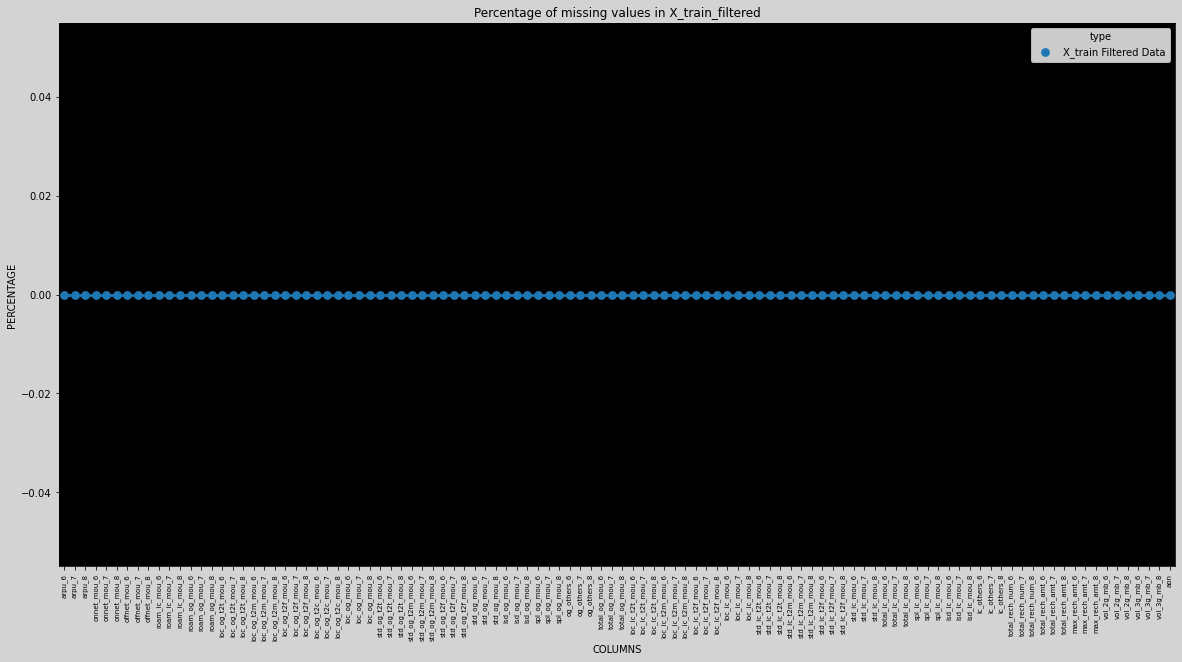

In [36]:
# Display percentage of missing values in the dataframe

fig = plt.figure(figsize=(20,10))
miss_X_train_filtered = pd.DataFrame((X_train_filtered.isnull().sum())*100/X_train_filtered.shape[0]).reset_index()
miss_X_train_filtered["type"] = "X_train Filtered Data"
ax = sns.pointplot("index",0,data=miss_X_train_filtered,hue="type")
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of missing values in X_train_filtered")
plt.ylabel("PERCENTAGE")
plt.xlabel("COLUMNS")
ax.set_facecolor("k")
fig.set_facecolor("lightgrey")
plt.show()

In [37]:
def missing_zero_values_table(X_train_data_filtered):
        zero_val = (X_train_filtered == 0.00).astype(int).sum(axis=0)
        mis_val = X_train_filtered.isnull().sum()
        mis_val_percent = 100 * X_train_filtered.isnull().sum() / len(X_train_filtered)
        mz_table = pd.concat([zero_val, mis_val, mis_val_percent], axis=1)
        mz_table = mz_table.rename(
        columns = {0 : 'Zero Values', 1 : 'Missing Values', 2 : '% of Total Values'})
        mz_table['Total Zero Missing Values'] = mz_table['Zero Values'] + mz_table['Missing Values']
        mz_table['% Total Zero Missing Values'] = 100 * mz_table['Total Zero Missing Values'] / len(X_train_filtered)
        mz_table['Data Type'] = X_train_filtered.dtypes
        mz_table = mz_table[
            mz_table.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("The dataframe has " + str(X_train_filtered.shape[1]) + " columns and " + str(X_train_filtered.shape[0]) + " Rows.\n"      
            "There are " + str(mz_table.shape[0]) +
              " columns that have missing values.")
#        mz_table.to_excel('D:/sampledata/missing_and_zero_values.xlsx', freeze_panes=(1,0), index = False)
        return mz_table

missing_zero_values_table(X_train_filtered)

The dataframe has 106 columns and 55999 Rows.
There are 0 columns that have missing values.


,Zero Values,Missing Values,% of Total Values,Total Zero Missing Values,% Total Zero Missing Values,Data Type


In [38]:
X_train_filtered.describe()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,aon
count,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.00000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000
mean,283.543210,278.241214,278.710188,128.868875,128.699786,126.000108,191.470860,189.168056,185.820359,9.241817,6.649924,6.555336,13.547161,9.441961,9.168734,45.288742,44.433644,43.736308,89.787709,87.571429,86.445402,3.632633,3.648861,3.478085,1.074949,1.299829,1.344069,138.716150,135.660997,133.666703,78.198108,80.403492,78.675268,84.851922,87.414400,85.369548,1.102673,1.056183,1.019227,164.155325,168.876662,165.066537,0.831661,0.797281,0.804255,3.829263,4.786665,4.777379,0.447690,0.022031,0.032688,307.987151,310.150028,304.353960,46.276119,46.188447,44.788411,102.902324,102.25773,102.207327,11.661153,12.159480,11.202209,160.848018,160.614167,158.206355,9.174459,9.524739,9.386850,20.168411,21.046021,20.239751,2.090814,2.114116,1.954910,31.436134,32.687371,31.583982,200.448273,202.301427,198.775543,0.059785,0.031996,0.038443,7.265773,7.971775,8.012622,0.831725,0.989783,0.927740,7.584064,7.711745,7.228326,328.620047,322.522188,323.539563,104.708388,104.121931,107.609922,51.358479,51.303267,49.991579,121.234379,128.617440,134.044310,1220.586046
std,320.797233,

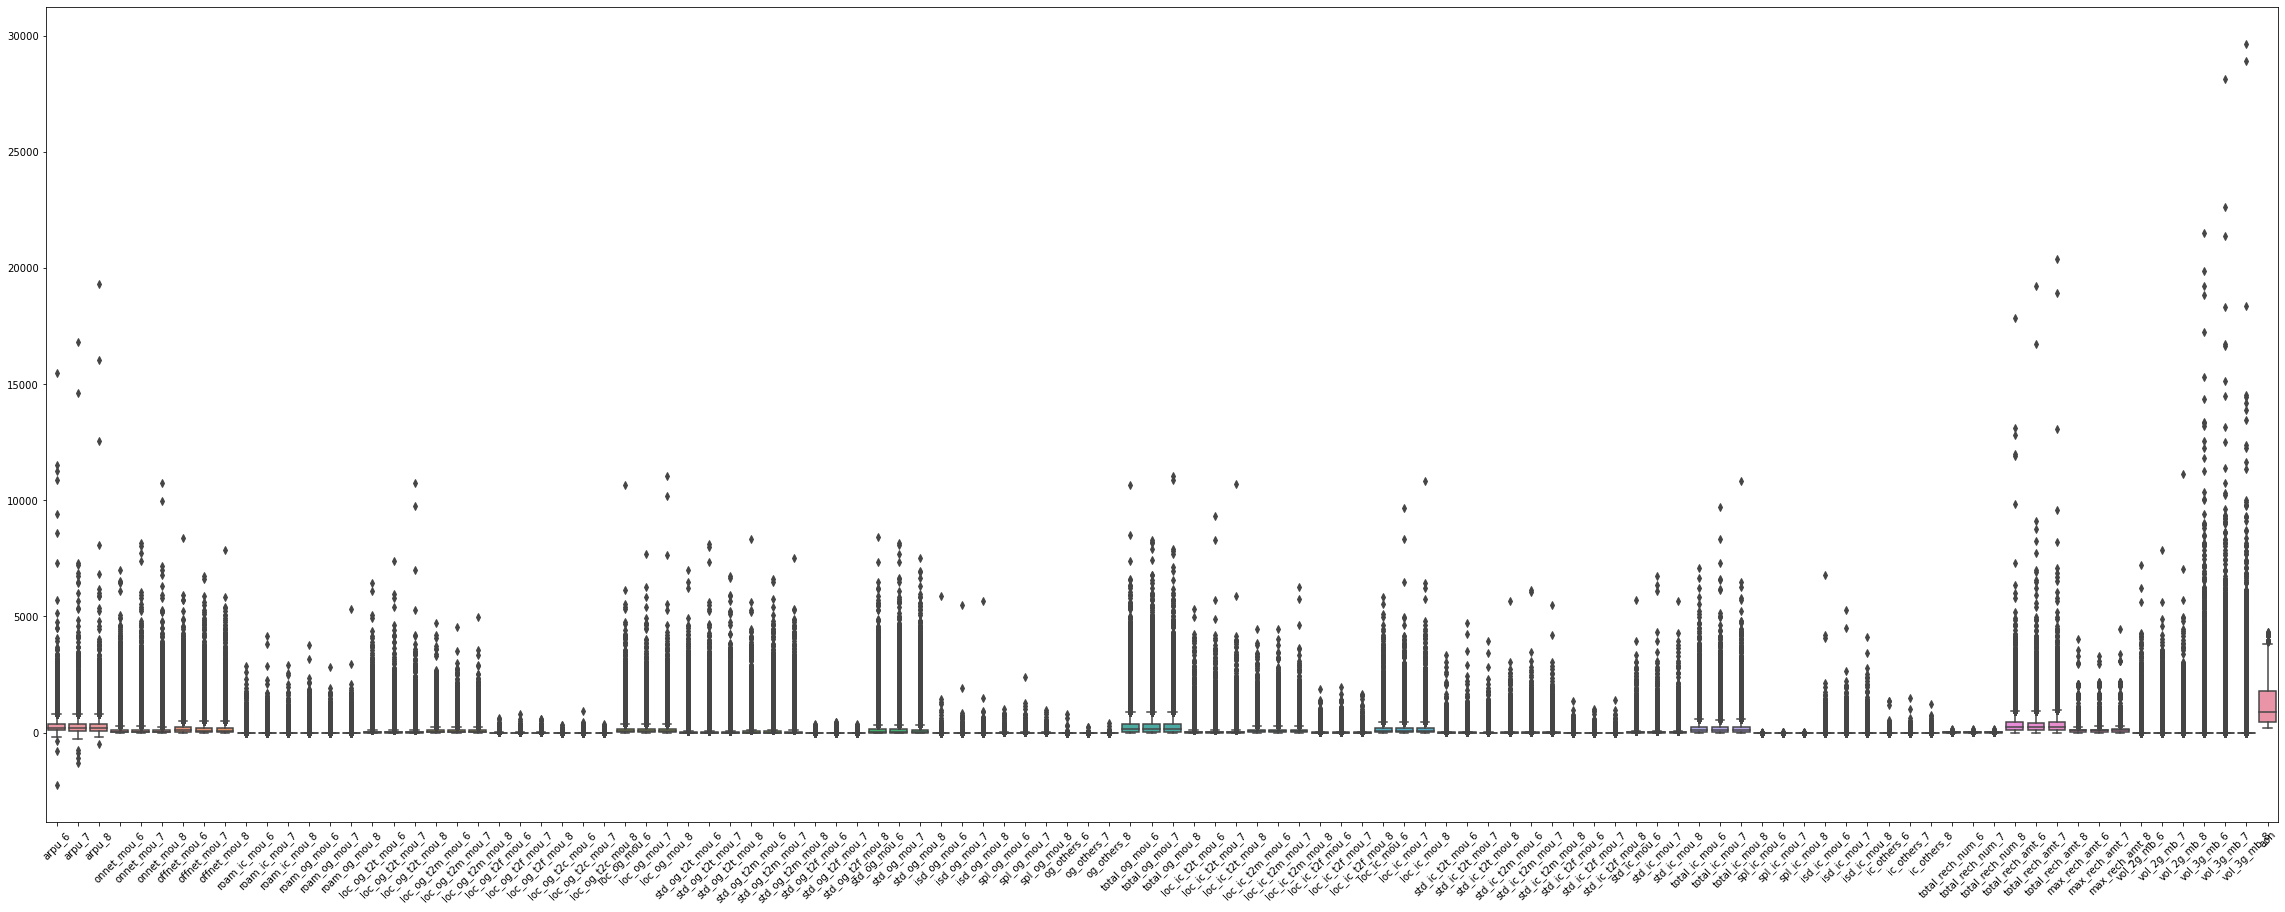

In [39]:
plt.figure(figsize=(40,15))
plt.xticks(rotation=45)
sns.boxplot(data = X_train_filtered)

plt.show()

#### 3.3.3. Handling outliers

In [40]:
def cap_outliers(array, k=3):
    upper_limit = array.mean() + k*array.std()
    lower_limit = array.mean() - k*array.std()
    array[array<lower_limit] = lower_limit
    array[array>upper_limit] = upper_limit
    return array

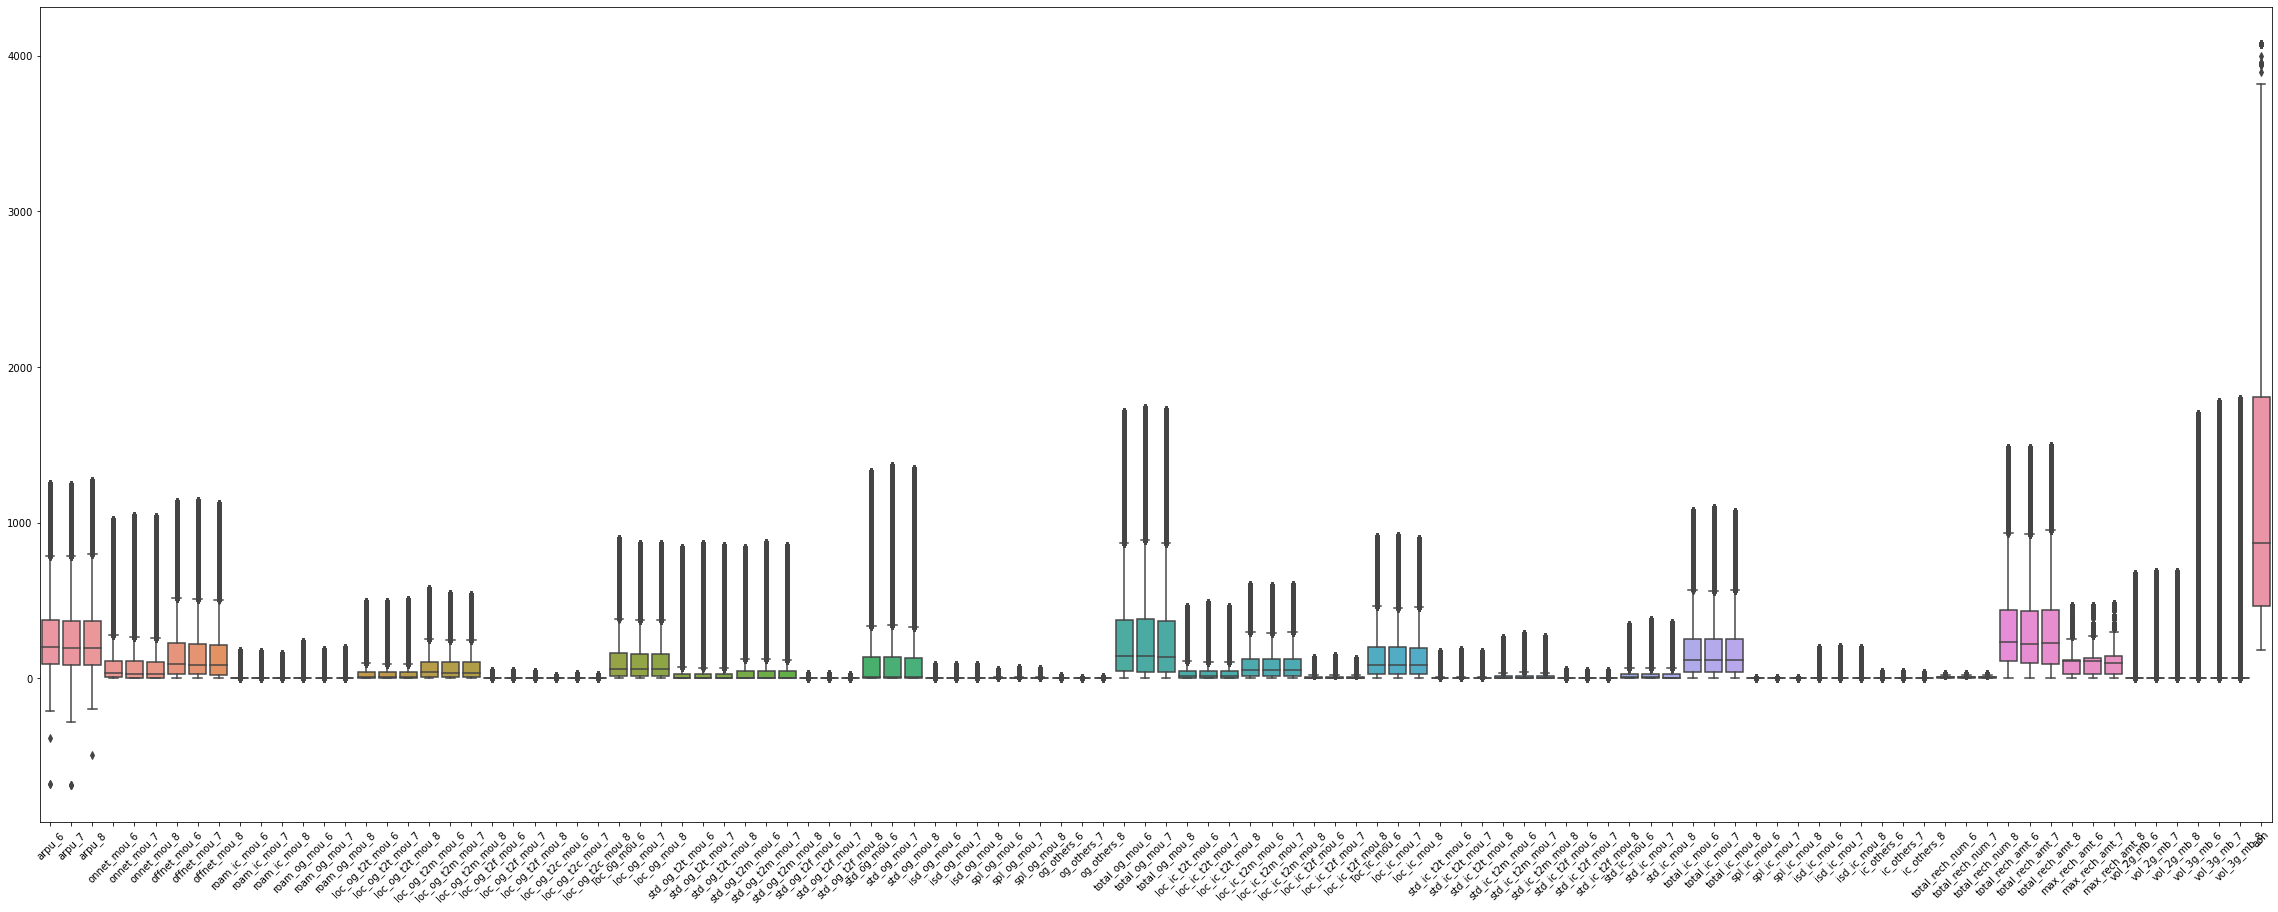

In [41]:
X_train_filtered1 = X_train_filtered.apply(cap_outliers, axis=0)

plt.figure(figsize=(40,15))
plt.xticks(rotation=45)
sns.boxplot(data = X_train_filtered1)

plt.show()

#### 3.3.4.  Feature scaling

In [42]:
scale = StandardScaler()
X_train_scaled = scale.fit_transform(X_train_filtered1)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=new_vars)

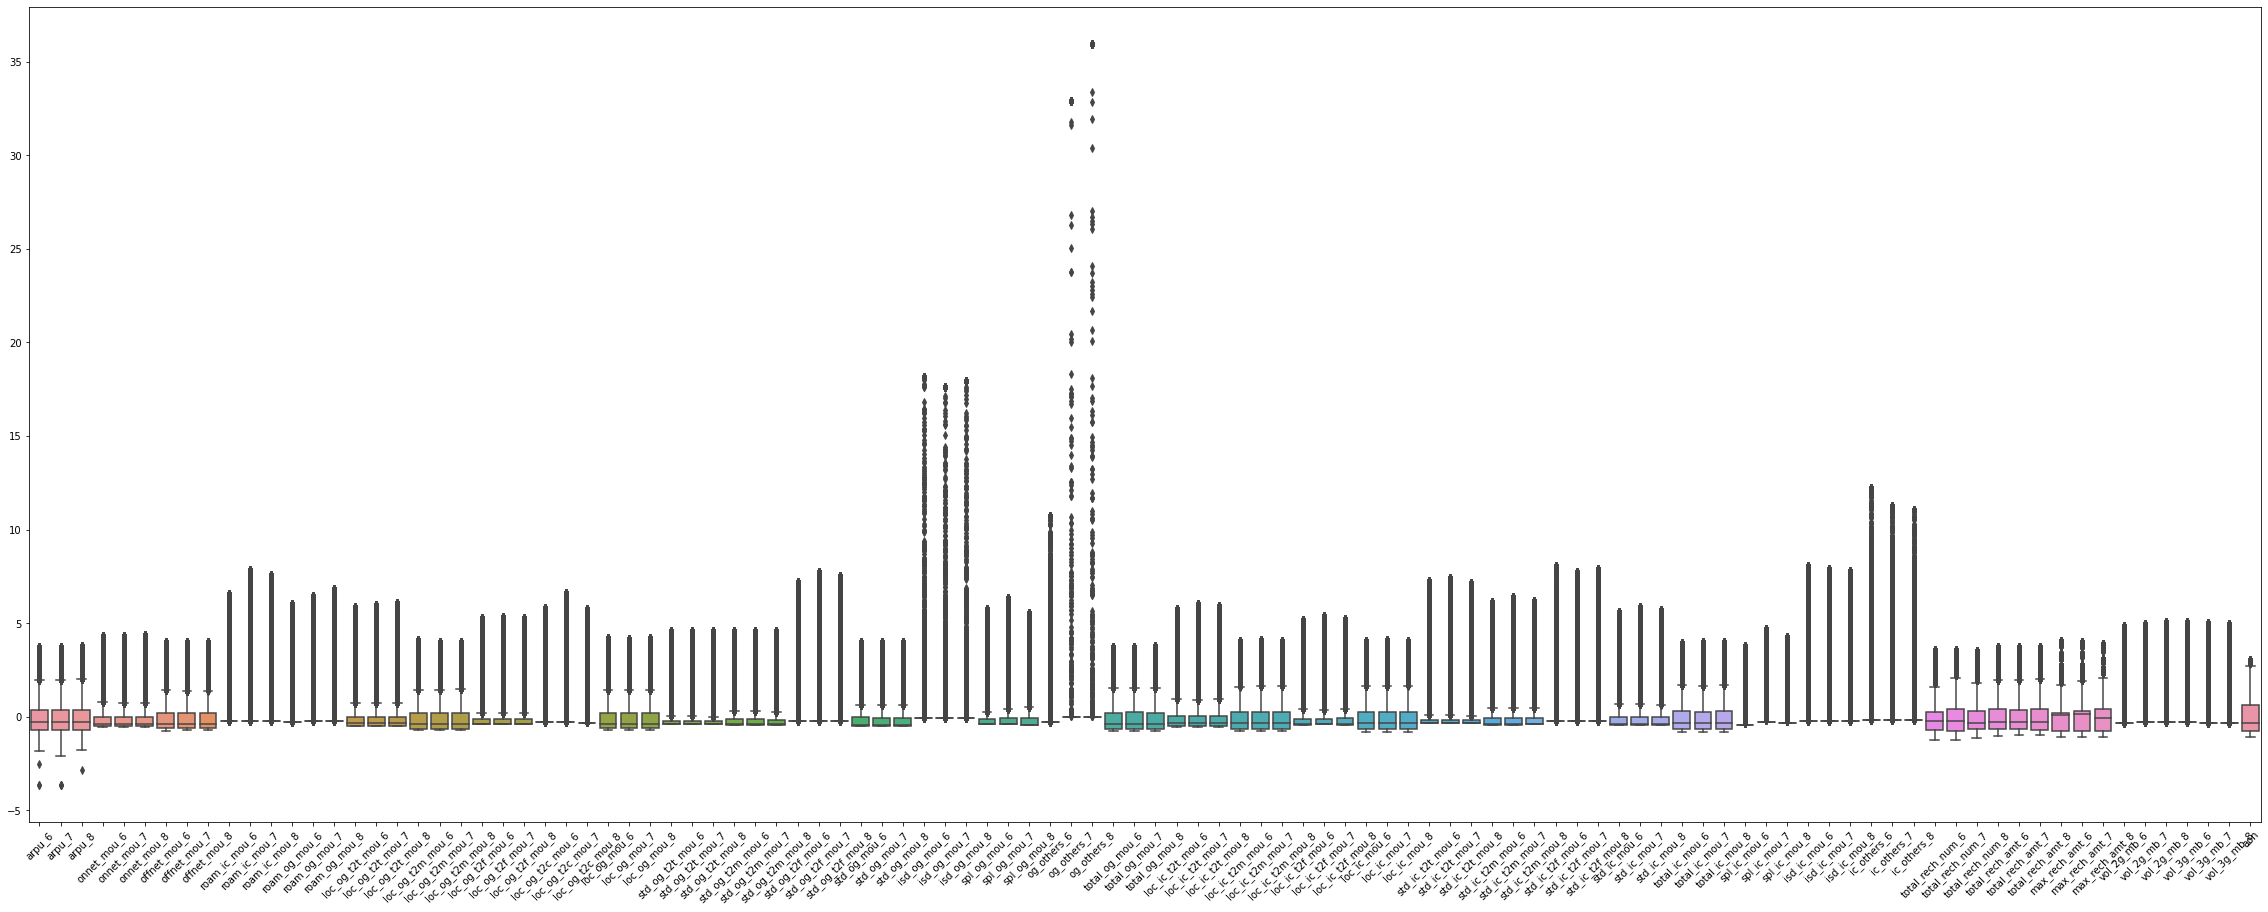

In [43]:
plt.figure(figsize=(40,15))
plt.xticks(rotation=45)
sns.boxplot(data = X_train_scaled)

plt.show()

Here we can perform feature transformations at this stage. 

1. **Positively skewed:** Common transformations of this data include square root, cube root, and log.
2. **Negatively skewed:** Common transformations include square, cube root and logarithmic.

Please read the following link to understand how to perform feature scaling and preprocessing : https://scikit-learn.org/stable/modules/preprocessing.html

#### 3.3.5.  Correlation Analysis

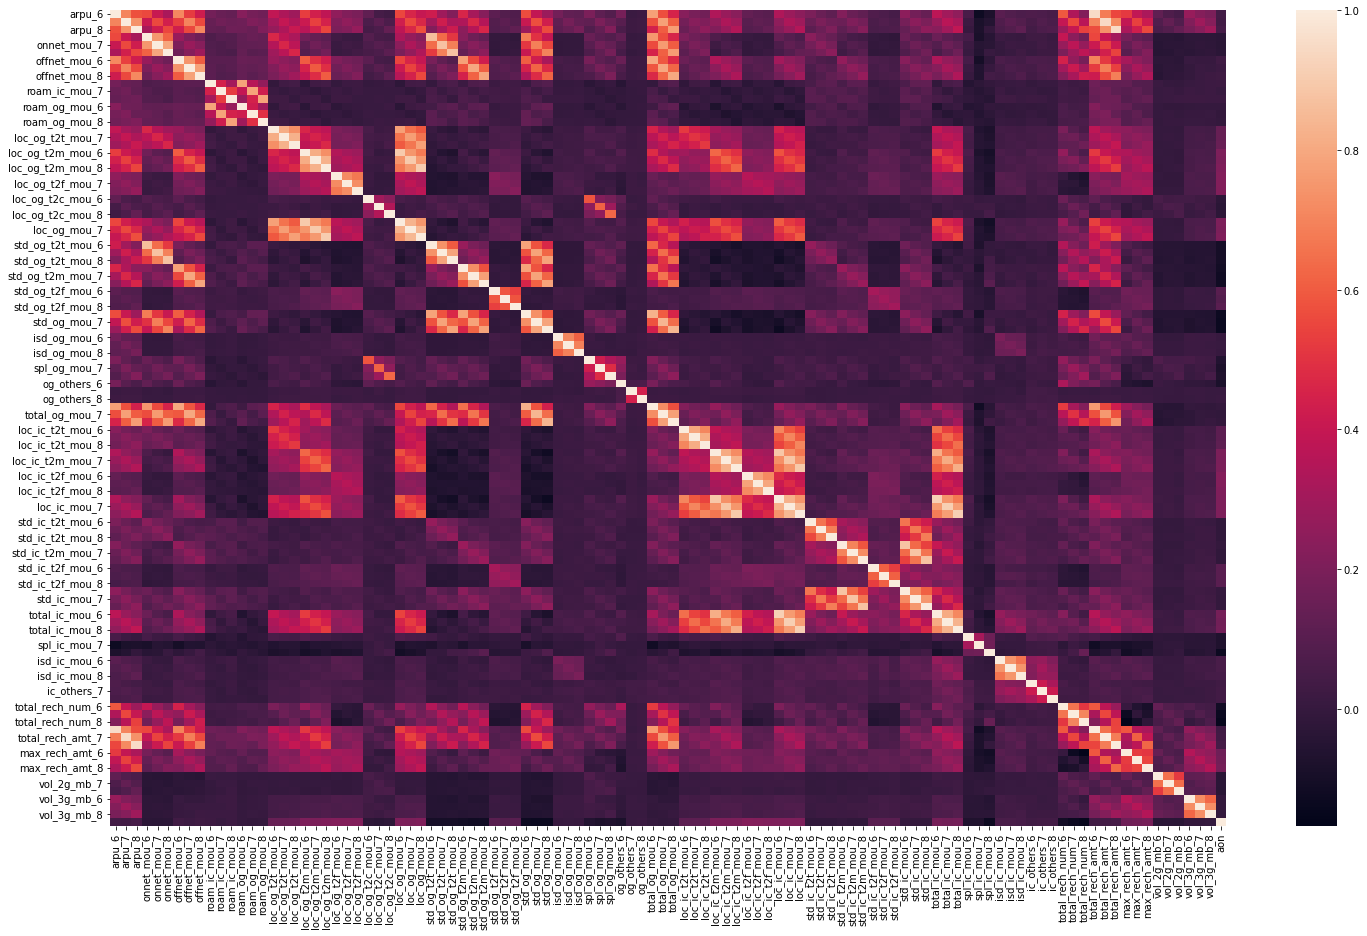

In [44]:
plt.figure(figsize=(25,15))
sns.heatmap(X_train_scaled.corr())

plt.show()

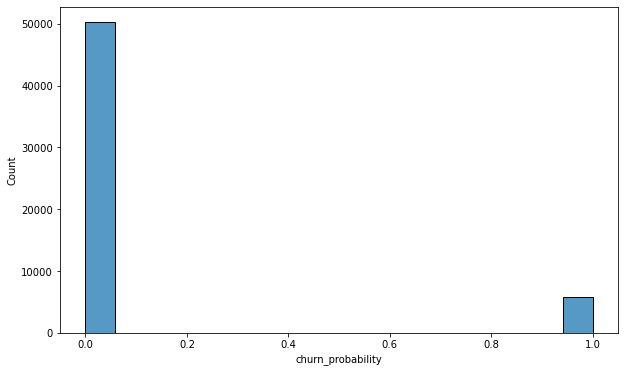

In [45]:
# Distribution for the churn probability

plt.figure(figsize=(10,6))
sns.histplot(y_train)

plt.show()

#### 3.3.6. Filter and scale test data

In [46]:
# Handling missing data - Filter test data

X_test_filtered = X_test[new_vars]
X_test_filtered.shape

(14000, 106)

In [47]:
# Handling missing data - Data imputation on test data

missing_test_data_percent = X_test_filtered.isnull().any()
impute_test_cols = missing_test_data_percent[missing_test_data_percent.gt(0)].index
impute_test_cols

Index(['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6',
       'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7',
       'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8',
       'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8',
       'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8',
       'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8',
       'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8',
       'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6',
       'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6',
       'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6',
       'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_mou_6', 'std_og_mou_7',
       'std_og_mou_8', 'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8',
       'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8', 'og_others_6',
       'og_others_7', 'og_others_8', 'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7',
       'lo

In [48]:
test_imp = SimpleImputer(strategy='constant', fill_value=0)
X_test_filtered[impute_test_cols] = test_imp.fit_transform(X_test_filtered[impute_test_cols])

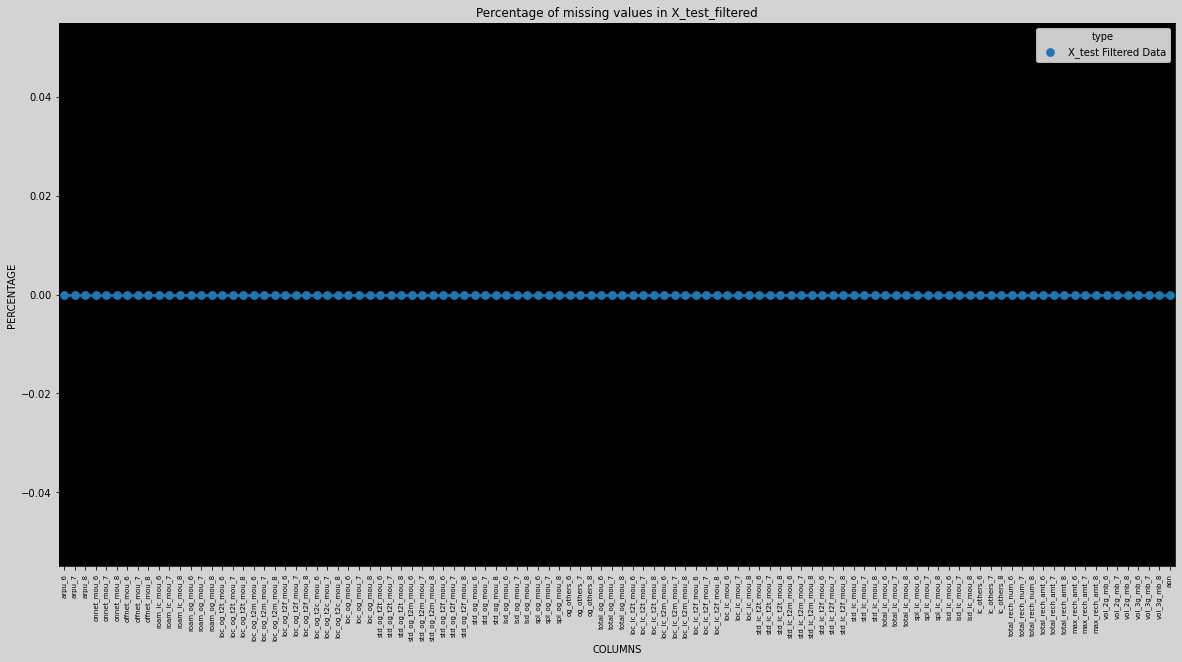

In [49]:
# Display percentage of missing values in the dataframe

fig = plt.figure(figsize=(20,10))
miss_X_test_filtered = pd.DataFrame((X_test_filtered.isnull().sum())*100/X_test_filtered.shape[0]).reset_index()
miss_X_test_filtered["type"] = "X_test Filtered Data"
ax = sns.pointplot("index",0,data=miss_X_test_filtered,hue="type")
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of missing values in X_test_filtered")
plt.ylabel("PERCENTAGE")
plt.xlabel("COLUMNS")
ax.set_facecolor("k")
fig.set_facecolor("lightgrey")
plt.show()

In [50]:
def missing_zero_values_table(X_test_data_filtered):
        zero_val = (X_test_filtered == 0.00).astype(int).sum(axis=0)
        mis_val = X_test_filtered.isnull().sum()
        mis_val_percent = 100 * X_test_filtered.isnull().sum() / len(X_test_filtered)
        mz_table = pd.concat([zero_val, mis_val, mis_val_percent], axis=1)
        mz_table = mz_table.rename(
        columns = {0 : 'Zero Values', 1 : 'Missing Values', 2 : '% of Total Values'})
        mz_table['Total Zero Missing Values'] = mz_table['Zero Values'] + mz_table['Missing Values']
        mz_table['% Total Zero Missing Values'] = 100 * mz_table['Total Zero Missing Values'] / len(X_test_filtered)
        mz_table['Data Type'] = X_test_filtered.dtypes
        mz_table = mz_table[
            mz_table.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("The dataframe has " + str(X_test_filtered.shape[1]) + " columns and " + str(X_test_filtered.shape[0]) + " Rows.\n"      
            "There are " + str(mz_table.shape[0]) +
              " columns that have missing values.")
#        mz_table.to_excel('D:/sampledata/missing_and_zero_values.xlsx', freeze_panes=(1,0), index = False)
        return mz_table

missing_zero_values_table(X_test_filtered)

The dataframe has 106 columns and 14000 Rows.
There are 0 columns that have missing values.


,Zero Values,Missing Values,% of Total Values,Total Zero Missing Values,% Total Zero Missing Values,Data Type


### 3.4.  Feature engineering and selection - Principle Component Analysis (PCA)

In [51]:
rf = RandomForestClassifier(n_estimators=100, n_jobs=-1)
rf.fit(X_train_scaled, y_train)

RandomForestClassifier(n_jobs=-1)

In [52]:
feature_importances = pd.DataFrame({'col':new_vars, 'importance':rf.feature_importances_})

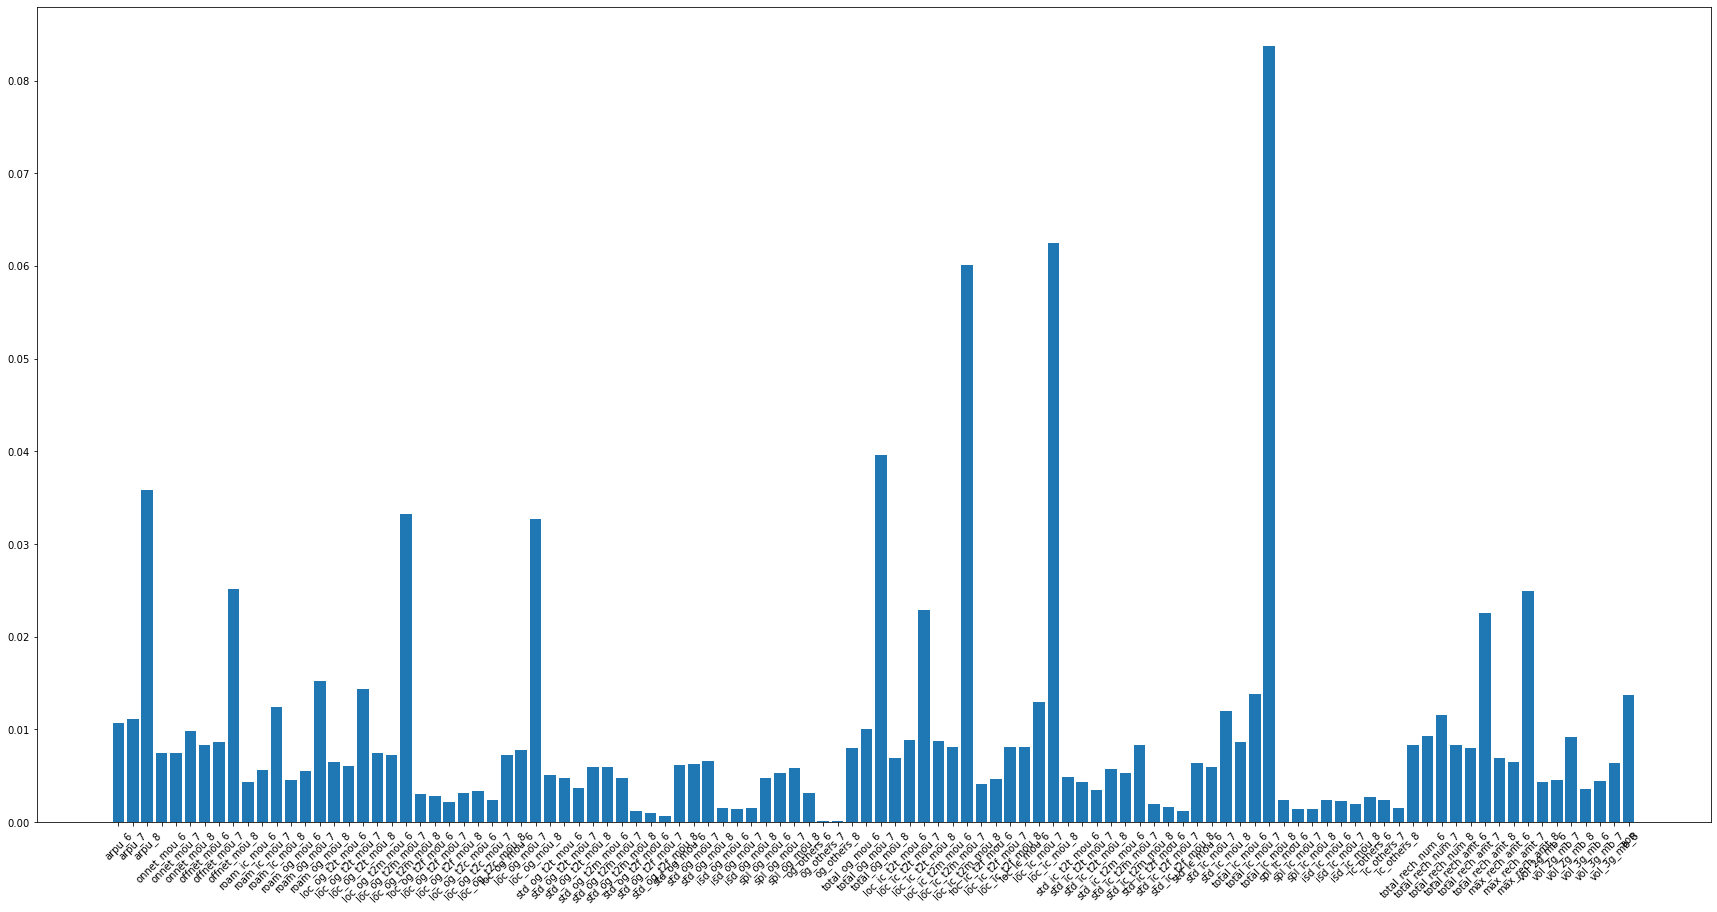

In [53]:
plt.figure(figsize=(30,15))
plt.xticks(rotation=45)
plt.bar(feature_importances['col'], feature_importances['importance'])

plt.show()

At this step, we can create a bunch of features based on business understanding, such as 
1. "average % gain of 3g volume from month 6 to 8" - (growth or decline of 3g usage month over month?)
2. "ratio of total outgoing amount and age of user on network" - (average daily usage of a user?)
3. "standard deviation of the total amount paid by user for all services" - (too much variability in charges?)
4. etc..

However due to time constraint, this has not been carried out.

Another way of finding good features would be to project them into a lower dimensional space using PCA. PCA creates components which are a linear combination of the features. This then allows you to select components which explain the highest amount of variance.

Lets try to project the data onto 2D space and plot. **Note:** you can try TSNE, which is another dimensionality reduction approach as well. Check https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html for moree details.

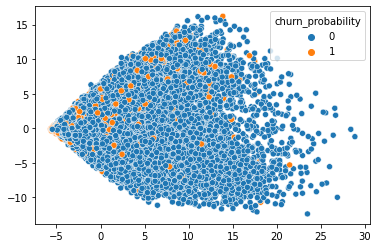

In [54]:
pca = PCA(random_state=42)
pca_components = pca.fit_transform(X_train_scaled)
sns.scatterplot(x=pca_components[:,0], y=pca_components[:,1], hue=y_train)
plt.show()

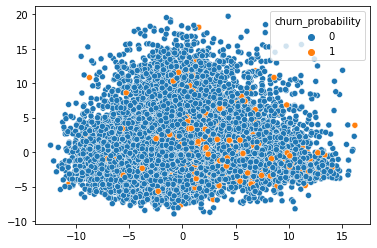

In [55]:
sns.scatterplot(x=pca_components[:,1], y=pca_components[:,2], hue=y_train)
plt.show()

In [56]:
pca_components

array([[-4.34450502e+00, -1.19889324e-01, -4.43114510e-01, ...,
        -2.32772801e-03,  2.51951544e-03,  7.57290376e-04],
       [-4.05430542e-01, -2.02704468e+00, -9.34438017e-01, ...,
        -8.98326647e-03,  1.46461134e-03,  4.27509094e-04],
       [-2.52310029e+00,  1.54214693e+00,  7.25647989e-01, ...,
        -2.82461721e-03, -8.04372490e-03,  6.51807108e-03],
       ...,
       [-4.15659070e+00, -1.50474644e-01, -4.10684889e-01, ...,
        -1.94161347e-03,  6.73519697e-03,  2.48303075e-03],
       [-2.22821149e+00,  7.70944553e-01,  2.32809484e+00, ...,
        -9.58042338e-03, -1.82023596e-03,  1.04660254e-03],
       [-2.85436004e+00, -1.01484053e+00, -4.97425817e-01, ...,
         8.71125134e-03, -1.25978191e-03,  1.72284612e-03]])

In [57]:
feature_importances

,col,importance
0,arpu_6,0.010734
1,arpu_7,0.011130
2,arpu_8,0.035879
3,onnet_mou_6,0.007405
4,onnet_mou_7,0.007415
...,...,...
101,vol_2g_mb_8,0.009218
102,vol_3g_mb_6,0.003608
103,vol_3g_mb_7,0.004460
104,vol_3g_mb_8,0.006381


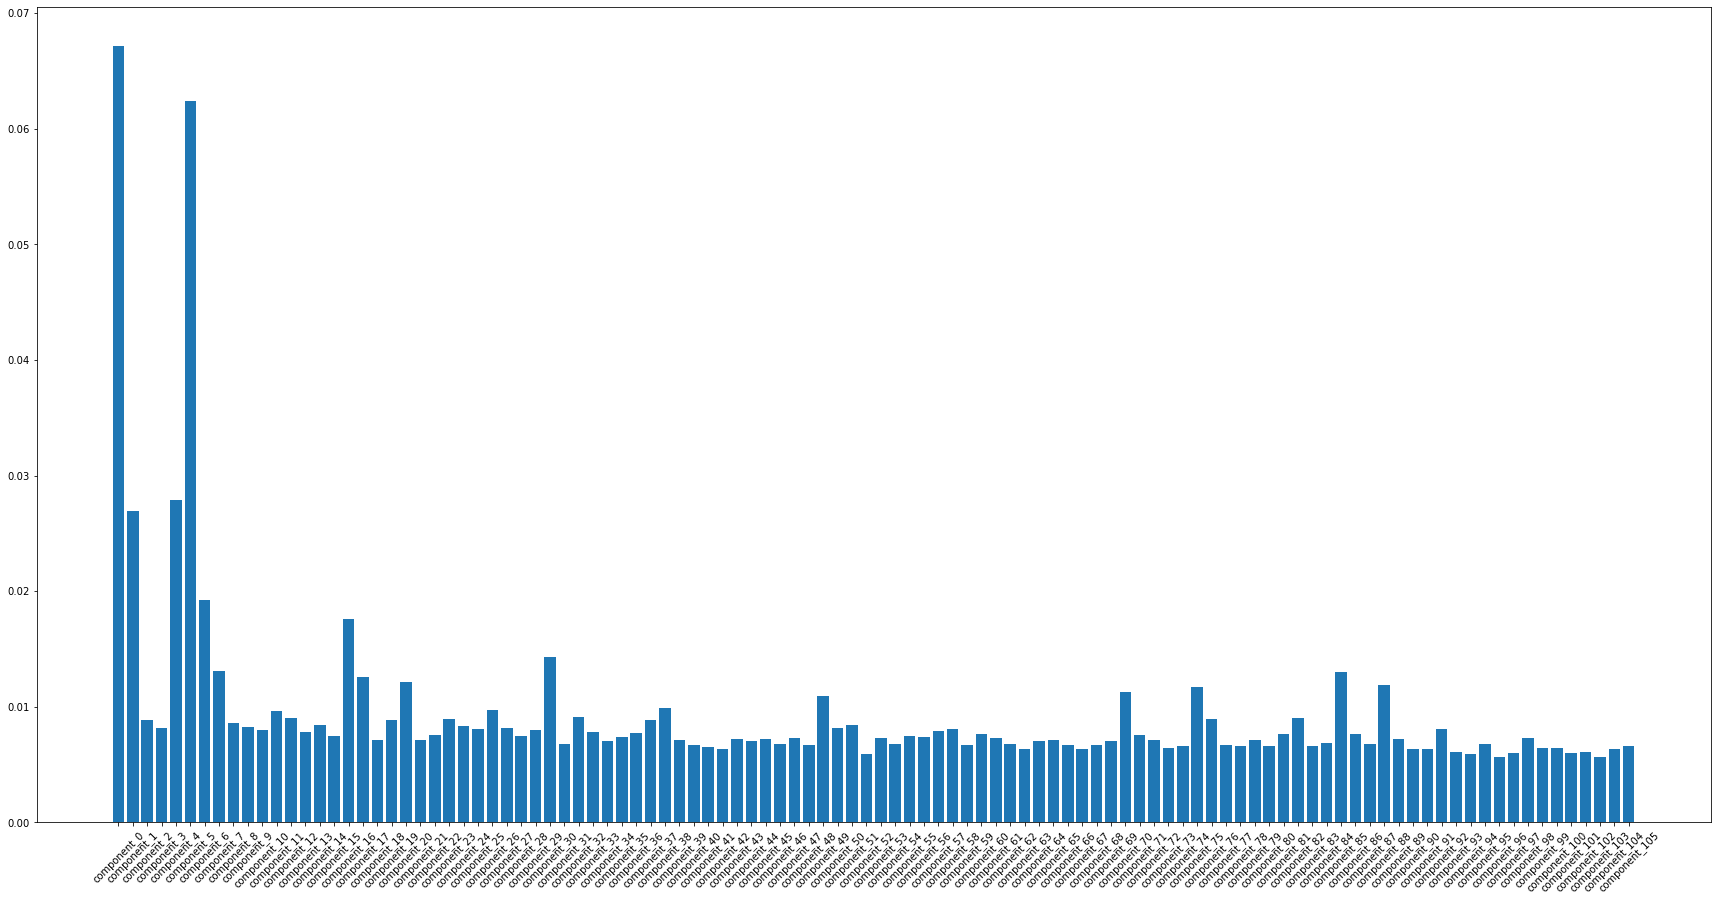

In [58]:
rf = RandomForestClassifier(n_estimators=100, n_jobs=-1)
rf.fit(pca_components, y_train)

feature_importances = pd.DataFrame({'col':['component_'+str(i) for i in range(106)], 
                                    'importance':rf.feature_importances_})


plt.figure(figsize=(30,15))
plt.xticks(rotation=45)
plt.bar(feature_importances['col'], feature_importances['importance'])

plt.show()

## Step 4. Model building

## 4a. Model building - Logistic Regression

Build a quick model with logistic regression.

In [59]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [60]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train_scaled, y_train)

In [61]:
list(zip(X_train_scaled.columns, rfe.support_, rfe.ranking_))

[('arpu_6', True, 1),
 ('arpu_7', False, 9),
 ('arpu_8', False, 29),
 ('onnet_mou_6', False, 77),
 ('onnet_mou_7', False, 40),
 ('onnet_mou_8', False, 5),
 ('offnet_mou_6', False, 42),
 ('offnet_mou_7', False, 14),
 ('offnet_mou_8', False, 6),
 ('roam_ic_mou_6', False, 66),
 ('roam_ic_mou_7', False, 75),
 ('roam_ic_mou_8', False, 76),
 ('roam_og_mou_6', False, 41),
 ('roam_og_mou_7', False, 85),
 ('roam_og_mou_8', False, 2),
 ('loc_og_t2t_mou_6', False, 25),
 ('loc_og_t2t_mou_7', False, 13),
 ('loc_og_t2t_mou_8', True, 1),
 ('loc_og_t2m_mou_6', False, 23),
 ('loc_og_t2m_mou_7', False, 34),
 ('loc_og_t2m_mou_8', True, 1),
 ('loc_og_t2f_mou_6', False, 38),
 ('loc_og_t2f_mou_7', False, 81),
 ('loc_og_t2f_mou_8', False, 48),
 ('loc_og_t2c_mou_6', False, 59),
 ('loc_og_t2c_mou_7', False, 60),
 ('loc_og_t2c_mou_8', False, 55),
 ('loc_og_mou_6', False, 24),
 ('loc_og_mou_7', False, 12),
 ('loc_og_mou_8', True, 1),
 ('std_og_t2t_mou_6', False, 47),
 ('std_og_t2t_mou_7', False, 16),
 ('std_og_t

In [62]:
col = X_train_scaled.columns[rfe.support_]

In [63]:
X_train_scaled.columns[~rfe.support_]

Index(['arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8',
       'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6',
       'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7',
       'roam_og_mou_8', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7',
       'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2f_mou_6',
       'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_6',
       'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_mou_6', 'loc_og_mou_7',
       'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8',
       'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8',
       'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8',
       'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8', 'isd_og_mou_6',
       'isd_og_mou_7', 'isd_og_mou_8', 'spl_og_mou_6', 'spl_og_mou_7',
       'spl_og_mou_8', 'og_others_6', 'og_others_7', 'og_others_8',
       'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8',
       'loc_ic_t2t_mou_6', 'loc_

Build Logistic Regression Model with PCA Components

In [64]:
lr = LogisticRegression(max_iter=1000, tol=0.001, solver='sag')
lr.fit(pca_components[:,:60], y_train)

LogisticRegression(max_iter=1000, solver='sag', tol=0.001)

In [65]:
lr.score(pca_components[:,:60], y_train)

0.9136770299469633

The model has 91.6% accuracy, but let's build a pipeline to fit and score the model faster.

The steps of this pipeline would be the following, but this is only one type of pipeline -
1. Imputation
2. Scaling
3. PCA
4. Classification model

We can change this pipeline, add addition transformations, change models, use cross validation or even use this pipeline to work with a Gridsearch. However due to time constraints, this has not been carried out.

In [66]:
imp = SimpleImputer(strategy='constant', fill_value=0)
scale = StandardScaler()
pca = PCA(n_components=60)
lr = LogisticRegression(max_iter=1000, tol=0.001)

In [67]:
pipe1 = Pipeline(steps = [('imputation',imp),
                         ('scaling',scale),
                         ('pca',pca),
                         ('model',lr)])

In [68]:
pipe1.fit(X_train[new_vars], y_train)

Pipeline(steps=[('imputation',
                 SimpleImputer(fill_value=0, strategy='constant')),
                ('scaling', StandardScaler()), ('pca', PCA(n_components=60)),
                ('model', LogisticRegression(max_iter=1000, tol=0.001))])

In [69]:
train_score = pipe1.score(X_train[new_vars], y_train)
print("Training accuracy:", train_score)

Training accuracy: 0.9106412614510974


In [70]:
test_score = pipe1.score(X_test[new_vars], y_test)
print("Test accuracy:", test_score)

Test accuracy: 0.9116428571428571


## 4b. Model building - Decision Tree

Build a Decision Tree model.

In [71]:
from sklearn.tree import DecisionTreeClassifier

In [72]:
dt_base = DecisionTreeClassifier(random_state=42, max_depth=4)

In [73]:
dt_base.fit(X_train_scaled[new_vars], y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [74]:
y_train_pred = dt_base.predict(X_train_scaled[new_vars])

In [75]:
from sklearn.metrics import classification_report

In [76]:
y_test_pred = dt_base.predict(X_test_filtered[new_vars])

In [77]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95     12610
           1       0.00      0.00      0.00      1390

    accuracy                           0.90     14000
   macro avg       0.45      0.50      0.47     14000
weighted avg       0.81      0.90      0.85     14000



#### Plot the ROC curve

In [78]:
from sklearn.metrics import plot_roc_curve

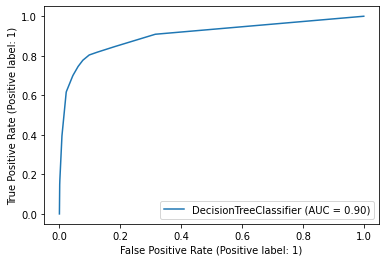

In [79]:
plot_roc_curve(dt_base, X_train_scaled, y_train, drop_intermediate=False)
plt.show()

#### Hyper-parameter tuning for the Decision Tree

In [80]:
from sklearn.model_selection import GridSearchCV

In [81]:
dt = DecisionTreeClassifier(random_state=42)

In [82]:
params = {
    "max_depth": [2,3,5,10,20],
    "min_samples_leaf": [5,10,20,50,100,500]
}

In [83]:
grid_search = GridSearchCV(estimator=dt,
                           param_grid=params,
                           cv=4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

In [84]:
%%time
grid_search.fit(X_train_scaled, y_train)

Fitting 4 folds for each of 30 candidates, totalling 120 fits
CPU times: user 2.11 s, sys: 266 ms, total: 2.38 s
Wall time: 52.8 s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 500]},
             scoring='accuracy', verbose=1)

In [85]:
grid_search.best_score_

0.9403739297704937

In [86]:
dt_best = grid_search.best_estimator_
dt_best

DecisionTreeClassifier(max_depth=5, min_samples_leaf=50, random_state=42)

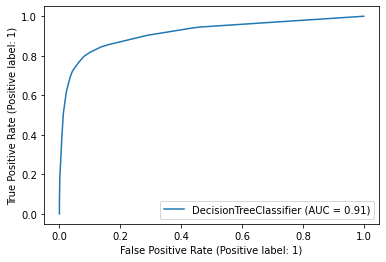

In [87]:
plot_roc_curve(dt_best, X_train_scaled, y_train)
plt.show()

Let us build Decision Tree model using pipeline

In [88]:
imp = SimpleImputer(strategy='constant', fill_value=0)
scale = StandardScaler()
pca = PCA(n_components=60)
dt = DecisionTreeClassifier(random_state=42)

In [89]:
pipe2 = Pipeline(steps = [('imputation',imp),
                         ('scaling',scale),
                         ('pca',pca),
                         ('model',dt)])

In [90]:
pipe2.fit(X_train[new_vars], y_train)

Pipeline(steps=[('imputation',
                 SimpleImputer(fill_value=0, strategy='constant')),
                ('scaling', StandardScaler()), ('pca', PCA(n_components=60)),
                ('model', DecisionTreeClassifier(random_state=42))])

In [91]:
train_score = pipe2.score(X_train[new_vars], y_train)
print("Training accuracy:", train_score)

Training accuracy: 0.9944641868604797


In [92]:
test_score = pipe2.score(X_test[new_vars], y_test)
print("Test accuracy:", test_score)

Test accuracy: 0.8757857142857143


## 4c. Model building - Random Forest

Build a Random Forest model.

In [93]:
from sklearn.ensemble import RandomForestClassifier

In [94]:
rf = RandomForestClassifier(n_estimators=10, max_depth=4, max_features=5, random_state=100, oob_score=True)

In [95]:
%%time
rf.fit(X_train_scaled, y_train)

CPU times: user 1.02 s, sys: 28.9 ms, total: 1.05 s
Wall time: 577 ms


RandomForestClassifier(max_depth=4, max_features=5, n_estimators=10,
                       oob_score=True, random_state=100)

In [96]:
rf.oob_score_

0.9287308701941106

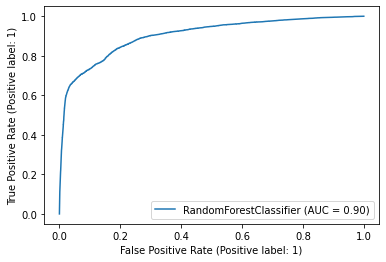

In [97]:
plot_roc_curve(rf, X_train_scaled, y_train)
plt.show()

### Grid search for hyper-parameter tuning

In [98]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

In [99]:
params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10, 25, 50, 100]
}

In [100]:
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

In [101]:
%%time
grid_search.fit(X_train_scaled, y_train)

Fitting 4 folds for each of 120 candidates, totalling 480 fits
CPU times: user 11.3 s, sys: 525 ms, total: 11.8 s
Wall time: 10min 15s


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 50, 100]},
             scoring='accuracy', verbose=1)

In [102]:
grid_search.best_score_

0.9412489552825202

In [103]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=5, min_samples_leaf=5, n_estimators=50,
                       n_jobs=-1, random_state=42)

In [104]:
from sklearn.metrics import plot_roc_curve

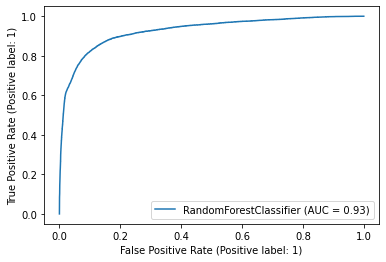

In [105]:
plot_roc_curve(rf_best, X_train_scaled, y_train)
plt.show()

In [106]:
rf_best.feature_importances_

array([3.22067933e-04, 3.88146507e-03, 9.20279296e-02, 3.57164769e-04,
       7.14023459e-04, 8.45852717e-03, 1.40206444e-04, 1.68219772e-03,
       6.99734659e-02, 3.97073404e-04, 2.08313584e-03, 9.14827808e-03,
       4.92482841e-04, 2.29222464e-03, 9.66335488e-03, 1.06931526e-03,
       1.22921237e-04, 2.11013019e-02, 9.01314957e-04, 8.46634379e-03,
       2.38698167e-02, 1.80863399e-04, 1.49802621e-04, 2.42671014e-04,
       1.19238189e-04, 6.50083618e-05, 0.00000000e+00, 3.53984079e-04,
       2.96302791e-04, 5.25079165e-02, 4.04887413e-04, 5.12251423e-04,
       5.28358658e-04, 3.80372874e-04, 2.54313543e-03, 3.22957562e-04,
       3.20618624e-05, 0.00000000e+00, 0.00000000e+00, 5.08216807e-04,
       1.64764382e-03, 1.06773159e-02, 1.01917256e-04, 1.44526090e-04,
       2.39348142e-04, 9.09242353e-05, 2.55432571e-04, 3.00484529e-03,
       3.10030576e-05, 0.00000000e+00, 0.00000000e+00, 1.31140279e-03,
       8.64267795e-03, 4.25740411e-02, 2.49599421e-04, 1.03596470e-02,
      

In [107]:
imp_df = pd.DataFrame({
    "Varname": X_train_scaled.columns,
    "Imp": rf_best.feature_importances_
})

In [108]:
imp_df.sort_values(by="Imp", ascending=False)

,Varname,Imp
80,total_ic_mou_8,0.181797
59,loc_ic_t2m_mou_8,0.110460
65,loc_ic_mou_8,0.101278
2,arpu_8,0.092028
8,offnet_mou_8,0.069973
...,...,...
88,ic_others_7,0.000000
38,std_og_t2f_mou_8,0.000000
37,std_og_t2f_mou_7,0.000000
49,og_others_7,0.000000


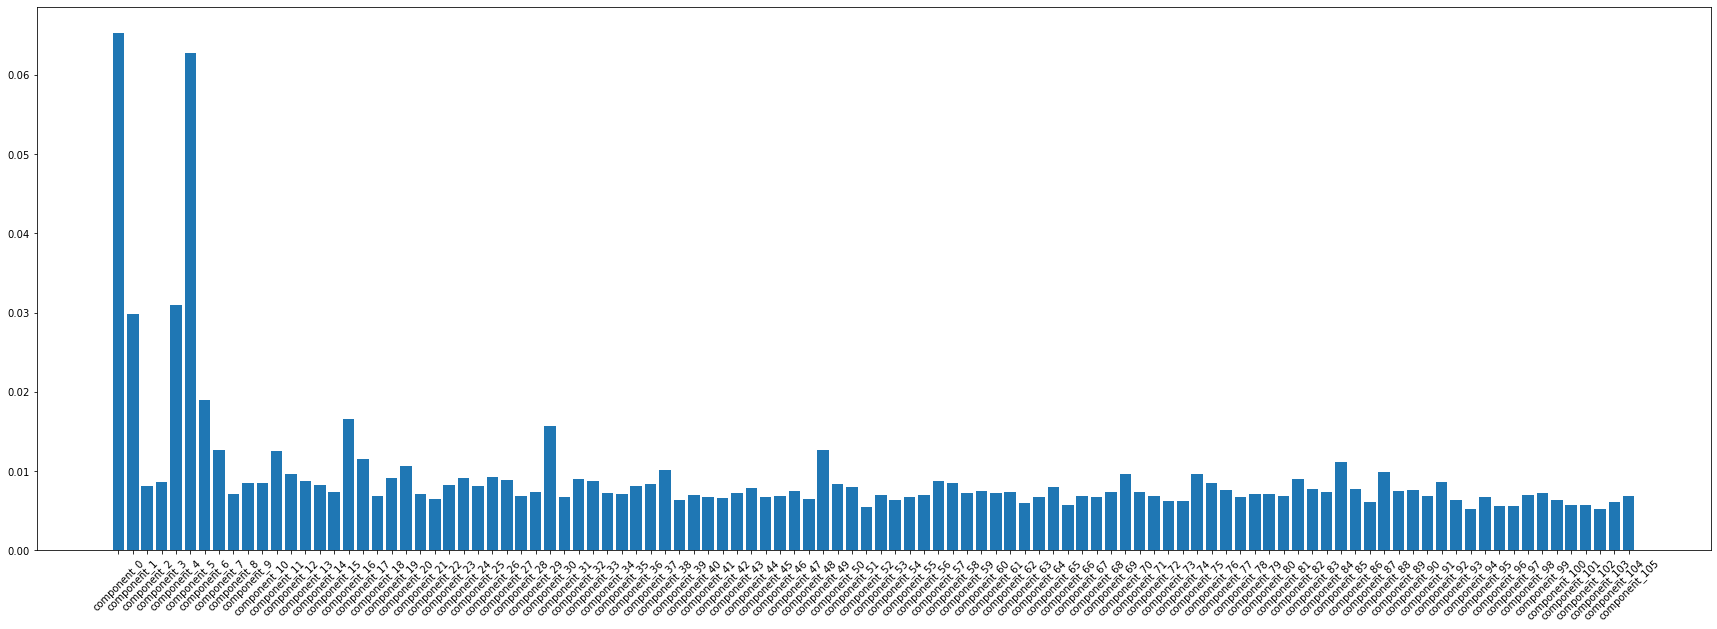

In [109]:
rf = RandomForestClassifier(n_estimators=25, n_jobs=-1)
rf.fit(pca_components, y_train)

feature_importances = pd.DataFrame({'col':['component_'+str(i) for i in range(106)], 
                                    'importance':rf.feature_importances_})

plt.figure(figsize=(30,10))
plt.xticks(rotation=45)
plt.bar(feature_importances['col'], feature_importances['importance'])

plt.show()

Let us build Random Forest model using pipeline

In [110]:
imp = SimpleImputer(strategy='constant', fill_value=0)
scale = StandardScaler()
pca = PCA(n_components=60)
rf = RandomForestClassifier(n_estimators=60, n_jobs=-1)

In [111]:
pipe3 = Pipeline(steps = [('imputation',imp),
                         ('scaling',scale),
                         ('pca',pca),
                         ('model',rf)])

In [112]:
pipe3.fit(X_train[new_vars], y_train)

Pipeline(steps=[('imputation',
                 SimpleImputer(fill_value=0, strategy='constant')),
                ('scaling', StandardScaler()), ('pca', PCA(n_components=60)),
                ('model', RandomForestClassifier(n_estimators=60, n_jobs=-1))])

In [113]:
train_score = pipe3.score(X_train[new_vars], y_train)
print("Training accuracy:", train_score)

Training accuracy: 0.9983571135198843


In [114]:
test_score = pipe3.score(X_test[new_vars], y_test)
print("Test accuracy:", test_score)

Test accuracy: 0.9198571428571428


Let us build Random Forest model using pipeline but change the imputer from SimpleImputer to MICE

In [140]:
from sklearn.impute import IterativeImputer
from sklearn import datasets, linear_model
lr = linear_model.LinearRegression()

In [141]:
imp = IterativeImputer(estimator=lr, verbose=2, max_iter=30, tol=1e-10, imputation_order='roman')
scale = StandardScaler()
pca = PCA(n_components=60)
rf = RandomForestClassifier(n_estimators=60, n_jobs=-1)

In [142]:
pipe4 = Pipeline(steps = [('imputation',imp),
                         ('scaling',scale),
                         ('pca',pca),
                         ('model',rf)])

In [143]:
pipe4.fit(X_train[new_vars], y_train)

[IterativeImputer] Completing matrix with shape (55999, 106)
[IterativeImputer] Ending imputation round 1/30, elapsed time 19.20
[IterativeImputer] Change: 162805.33111298966, scaled tolerance: 2.965183e-06 
[IterativeImputer] Ending imputation round 2/30, elapsed time 43.56
[IterativeImputer] Change: 71594.13690398204, scaled tolerance: 2.965183e-06 
[IterativeImputer] Ending imputation round 3/30, elapsed time 65.09
[IterativeImputer] Change: 73500.1494438987, scaled tolerance: 2.965183e-06 
[IterativeImputer] Ending imputation round 4/30, elapsed time 85.91
[IterativeImputer] Change: 19810.70665256017, scaled tolerance: 2.965183e-06 
[IterativeImputer] Ending imputation round 5/30, elapsed time 107.24
[IterativeImputer] Change: 5043.388972094392, scaled tolerance: 2.965183e-06 
[IterativeImputer] Ending imputation round 6/30, elapsed time 129.43
[IterativeImputer] Change: 1416.8938935136914, scaled tolerance: 2.965183e-06 
[IterativeImputer] Ending imputation round 7/30, elapsed tim

Pipeline(steps=[('imputation',
                 IterativeImputer(estimator=LinearRegression(),
                                  imputation_order='roman', max_iter=30,
                                  tol=1e-10, verbose=2)),
                ('scaling', StandardScaler()), ('pca', PCA(n_components=60)),
                ('model', RandomForestClassifier(n_estimators=60, n_jobs=-1))])

In [144]:
train_score = pipe4.score(X_train[new_vars], y_train)
print("Training accuracy:", train_score)

[IterativeImputer] Completing matrix with shape (55999, 106)
[IterativeImputer] Ending imputation round 1/30, elapsed time 1.36
[IterativeImputer] Ending imputation round 2/30, elapsed time 2.59
[IterativeImputer] Ending imputation round 3/30, elapsed time 3.90
[IterativeImputer] Ending imputation round 4/30, elapsed time 5.59
[IterativeImputer] Ending imputation round 5/30, elapsed time 6.93
[IterativeImputer] Ending imputation round 6/30, elapsed time 8.24
[IterativeImputer] Ending imputation round 7/30, elapsed time 9.51
[IterativeImputer] Ending imputation round 8/30, elapsed time 10.84
[IterativeImputer] Ending imputation round 9/30, elapsed time 12.11
[IterativeImputer] Ending imputation round 10/30, elapsed time 13.35
[IterativeImputer] Ending imputation round 11/30, elapsed time 14.60
[IterativeImputer] Ending imputation round 12/30, elapsed time 15.88
[IterativeImputer] Ending imputation round 13/30, elapsed time 17.16
[IterativeImputer] Ending imputation round 14/30, elapsed 

In [145]:
test_score = pipe4.score(X_test[new_vars], y_test)
print("Test accuracy:", test_score)

[IterativeImputer] Completing matrix with shape (14000, 106)
[IterativeImputer] Ending imputation round 1/30, elapsed time 0.27
[IterativeImputer] Ending imputation round 2/30, elapsed time 0.52
[IterativeImputer] Ending imputation round 3/30, elapsed time 0.78
[IterativeImputer] Ending imputation round 4/30, elapsed time 1.04
[IterativeImputer] Ending imputation round 5/30, elapsed time 1.29
[IterativeImputer] Ending imputation round 6/30, elapsed time 1.54
[IterativeImputer] Ending imputation round 7/30, elapsed time 1.79
[IterativeImputer] Ending imputation round 8/30, elapsed time 2.04
[IterativeImputer] Ending imputation round 9/30, elapsed time 2.30
[IterativeImputer] Ending imputation round 10/30, elapsed time 2.56
[IterativeImputer] Ending imputation round 11/30, elapsed time 2.81
[IterativeImputer] Ending imputation round 12/30, elapsed time 3.07
[IterativeImputer] Ending imputation round 13/30, elapsed time 3.33
[IterativeImputer] Ending imputation round 14/30, elapsed time 3

## Step 5. Model Evaluation

Let's make a confusion matrix to analyze how each class is being predicted by the model.

In [146]:
confusion_train = confusion_matrix(y_train, pipe4.predict(X_train[new_vars]))
print(confusion_train)

[IterativeImputer] Completing matrix with shape (55999, 106)
[IterativeImputer] Ending imputation round 1/30, elapsed time 1.19
[IterativeImputer] Ending imputation round 2/30, elapsed time 2.34
[IterativeImputer] Ending imputation round 3/30, elapsed time 3.48
[IterativeImputer] Ending imputation round 4/30, elapsed time 4.64
[IterativeImputer] Ending imputation round 5/30, elapsed time 5.84
[IterativeImputer] Ending imputation round 6/30, elapsed time 7.10
[IterativeImputer] Ending imputation round 7/30, elapsed time 8.59
[IterativeImputer] Ending imputation round 8/30, elapsed time 10.02
[IterativeImputer] Ending imputation round 9/30, elapsed time 11.37
[IterativeImputer] Ending imputation round 10/30, elapsed time 12.67
[IterativeImputer] Ending imputation round 11/30, elapsed time 14.01
[IterativeImputer] Ending imputation round 12/30, elapsed time 15.30
[IterativeImputer] Ending imputation round 13/30, elapsed time 16.61
[IterativeImputer] Ending imputation round 14/30, elapsed 

In [147]:
confusion_test = confusion_matrix(y_test, pipe4.predict(X_test[new_vars]))
print(confusion_test)

[IterativeImputer] Completing matrix with shape (14000, 106)
[IterativeImputer] Ending imputation round 1/30, elapsed time 0.28
[IterativeImputer] Ending imputation round 2/30, elapsed time 0.54
[IterativeImputer] Ending imputation round 3/30, elapsed time 0.81
[IterativeImputer] Ending imputation round 4/30, elapsed time 1.07
[IterativeImputer] Ending imputation round 5/30, elapsed time 1.33
[IterativeImputer] Ending imputation round 6/30, elapsed time 1.59
[IterativeImputer] Ending imputation round 7/30, elapsed time 1.86
[IterativeImputer] Ending imputation round 8/30, elapsed time 2.12
[IterativeImputer] Ending imputation round 9/30, elapsed time 2.37
[IterativeImputer] Ending imputation round 10/30, elapsed time 2.64
[IterativeImputer] Ending imputation round 11/30, elapsed time 2.90
[IterativeImputer] Ending imputation round 12/30, elapsed time 3.16
[IterativeImputer] Ending imputation round 13/30, elapsed time 3.43
[IterativeImputer] Ending imputation round 14/30, elapsed time 3

In [148]:
precision_score(y_test, pipe4.predict(X_test[new_vars]))

[IterativeImputer] Completing matrix with shape (14000, 106)
[IterativeImputer] Ending imputation round 1/30, elapsed time 0.28
[IterativeImputer] Ending imputation round 2/30, elapsed time 0.57
[IterativeImputer] Ending imputation round 3/30, elapsed time 0.82
[IterativeImputer] Ending imputation round 4/30, elapsed time 1.08
[IterativeImputer] Ending imputation round 5/30, elapsed time 1.34
[IterativeImputer] Ending imputation round 6/30, elapsed time 1.60
[IterativeImputer] Ending imputation round 7/30, elapsed time 1.87
[IterativeImputer] Ending imputation round 8/30, elapsed time 2.13
[IterativeImputer] Ending imputation round 9/30, elapsed time 2.39
[IterativeImputer] Ending imputation round 10/30, elapsed time 2.64
[IterativeImputer] Ending imputation round 11/30, elapsed time 2.90
[IterativeImputer] Ending imputation round 12/30, elapsed time 3.16
[IterativeImputer] Ending imputation round 13/30, elapsed time 3.42
[IterativeImputer] Ending imputation round 14/30, elapsed time 3

0.8236994219653179

In [149]:
recall_score(y_test, pipe4.predict(X_test[new_vars]))

[IterativeImputer] Completing matrix with shape (14000, 106)
[IterativeImputer] Ending imputation round 1/30, elapsed time 0.28
[IterativeImputer] Ending imputation round 2/30, elapsed time 0.57
[IterativeImputer] Ending imputation round 3/30, elapsed time 0.84
[IterativeImputer] Ending imputation round 4/30, elapsed time 1.11
[IterativeImputer] Ending imputation round 5/30, elapsed time 1.38
[IterativeImputer] Ending imputation round 6/30, elapsed time 1.65
[IterativeImputer] Ending imputation round 7/30, elapsed time 1.91
[IterativeImputer] Ending imputation round 8/30, elapsed time 2.20
[IterativeImputer] Ending imputation round 9/30, elapsed time 2.46
[IterativeImputer] Ending imputation round 10/30, elapsed time 2.73
[IterativeImputer] Ending imputation round 11/30, elapsed time 3.07
[IterativeImputer] Ending imputation round 12/30, elapsed time 3.36
[IterativeImputer] Ending imputation round 13/30, elapsed time 3.66
[IterativeImputer] Ending imputation round 14/30, elapsed time 3

0.41007194244604317

In [150]:
TP = confusion_test[1,1] # true positive 
TN = confusion_test[0,0] # true negatives
FP = confusion_test[0,1] # false positives
FN = confusion_test[1,0] # false negatives

In [151]:
# sensitivity

TP / float(TP+FN)

0.41007194244604317

In [152]:
# specificity

TN / float(TN+FP)

0.9903251387787471

In [153]:
# Calculate false postive rate - predicting churn when customer does not have churned

print(FP/ float(TN+FP))

0.009674861221252974


In [154]:
# positive predictive value 

print (TP / float(TP+FP))

0.8236994219653179


In [155]:
# Negative predictive value

print (TN / float(TN+ FN))

0.9383829275623685


## Step 6. Model Deployment

##### There are 3 methods of model deployment:


1. On-demand/online deployment: Deploying machine learning models as web services - 
   - Web services can provide cheaper and near real-time predictions. 
   - Availability of CPU power is less of an issue if the model runs on a cluster or cloud service. 
   - The model can be easily made available to other applications through API calls and so on.


2. Batch deployment: Deploying machine learning models for batch prediction - 
   - Offline models can be optimized to handle a high volume of job instances and run more complex models. In batch production mode, you don't need to worry about scaling or managing servers either.
   - It is also easy to debug an offline model when failures occur or tune hyperparameters since it runs on powerful servers.


3. Embedded deployment: Deploying machine learning models on edge devices - 
   The benefits of deploying a machine learning model on edge devices include, but are not limited to,
   - Reduced latency as the device is likely to be close to the user than a server far away.
   - Reduce data bandwidth consumption as we ship processed results back to the cloud instead of raw data that requires big size and eventually more bandwidth.

## Step 7. Creating submission file

The format is same as the sample.csv file. It contains 2 columns, id and churn_probability.

In [156]:
sample_output.head()

,id,churn_probability
0,69999,0
1,70000,0
2,70001,0
3,70002,0
4,70003,0


In [157]:
unseen_data.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability,total_arpu,cust_type,churn_yes,churn_no
0,69999,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,91.882,65.330,64.445,31.78,20.23,23.11,60.16,32.16,34.83,0.00,0.00,0.00,0.00,0.00,0.00,24.88,20.23,21.06,18.13,10.89,8.36,0.00,13.58,0.00,0.0,0.00,0.03,43.01,44.71,29.43,6.90,0.00,2.05,42.03,7.68,26.43,0.0,0.0,0.0,0.0,0.0,0.0,48.93,7.68,28.48,0.0,0.0,0.0,0.00,0.00,0.03,0.0,0.0,0.0,91.94,52.39,57.94,30.33,37.56,21.98,10.21,4.59,9.53,0.26,0.00,0.00,40.81,42.16,31.51,0.00,0.00,0.00,0.36,1.04,4.34,0.0,0.0,0.00,0.0,0.0,0.0,0.36,1.04,4.34,41.73,43.56,36.26,0.54,0.34,0.39,0.00,0.00,0.00,0.0,0.0,0.00,5,5,4,103,90,60,50,30,30,6/21/2014,7/26/2014,8/24/2014,30,30,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1692,0.00,0.00,0.00,0,221.657,Mid Value,0,1
1,70000,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,414.168,515.568,360.868,75.51,41.21,19.84,474.34,621.84,394.94,0.00,0.00,0.00,0.00,0.00,0.00,75.51,41.21,19.84,473.61,598.08,377.26,0.73,0.00,0.00,0.0,0.00,0.00,549.86,639.29,397.11,0.00,0.00,0.00,0.00,23.76,17.68,0.0,0.0,0.0,0.0,0.0,0.0,0.00,23.76,17.68,0.0,0.0,0.8,0.00,0.00,0.00,0.0,0.0,0.0,549.86,663.06,415.59,19.99,26.95,2.61,160.19,122.29,184.81,1.49,0.00,0.00,181.69,149.24,187.43,0.00,0.00,0.00,0.00,12.51,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,12.51,0.00,296.33,339.64,281.66,0.00,0.00,0.00,114.63,177.88,94.23,0.0,0.0,0

In [158]:
unseen_data.describe()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability,total_arpu,churn_yes,churn_no
count,30000.000000,30000.0,29684.0,29684.0,29684.0,30000.000000,30000.000000,30000.000000,28831.000000,28828.000000,28325.000000,28831.000000,28828.000000,28325.000000,28831.000000,28828.000000,28325.000000,28831.000000,28828.000000,28325.000000,28831.000000,28828.000000,28325.000000,28831.000000,28828.000000,28325.000000,28831.000000,28828.000000,28325.000000,28831.000000,28828.000000,28325.000000,28831.000000,28828.000000,28325.000000,28831.000000,28828.000000,28325.000000,28831.000000,28828.000000,28325.000000,28831.000000,28828.000000,28325.000000,28831.0,28828.0,28325.0,28831.000000,28828.000000,28325.000000,28831.000000,28828.000000,28325.000000,28831.000000,28828.000000,28325.000000,28831.000000,28828.000000,28325.000000,30000.000000,30000.000000,30000.000000,28831.000000,28828.000000,28325.000000,28831.000000,28828.000000,28325.000000,28831.000000,28828.000000,28325.000000,28831.000000,28828.000000,28325.000000,28831.000000,28828.000000,28325.000000,28831.000000,28828.000000,28325.000000,28831.000000,28828.000000,28325.000000,28831.0,28828.0,28325.0,28831.000000,28828.000000,28325.000000,30000.000000,30000.000000,30000.000000,28831.000000,28828.000000,28325.000000,28831.000000,28828.000000,28325.000000,28831.000000,28828.000000,28325.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,7585.000000,7706.000000,7922.000000,7585.000000,7706.000000,7922.000000,7585.000000,7706.000000,7922.000000,7585.000000,7706.000000,7922.000000,7585.000000,7706.000000,7922.000000,30000.0000

Select the columns that we want to work with.

In [159]:
submission_data = unseen_data.set_index('id')[new_vars]
submission_data.shape

(30000, 106)

Next, lets create a new column in the unseen dataset called churn_probability and use the model pipeline to predict the probabilities for this data.

In [160]:
unseen_data['churn_probability'] = pipe4.predict(submission_data)
output = unseen_data[['id','churn_probability']]
output.head()

[IterativeImputer] Completing matrix with shape (30000, 106)
[IterativeImputer] Ending imputation round 1/30, elapsed time 0.60
[IterativeImputer] Ending imputation round 2/30, elapsed time 1.22
[IterativeImputer] Ending imputation round 3/30, elapsed time 1.82
[IterativeImputer] Ending imputation round 4/30, elapsed time 2.39
[IterativeImputer] Ending imputation round 5/30, elapsed time 2.94
[IterativeImputer] Ending imputation round 6/30, elapsed time 3.52
[IterativeImputer] Ending imputation round 7/30, elapsed time 4.08
[IterativeImputer] Ending imputation round 8/30, elapsed time 4.65
[IterativeImputer] Ending imputation round 9/30, elapsed time 5.20
[IterativeImputer] Ending imputation round 10/30, elapsed time 5.75
[IterativeImputer] Ending imputation round 11/30, elapsed time 6.31
[IterativeImputer] Ending imputation round 12/30, elapsed time 6.86
[IterativeImputer] Ending imputation round 13/30, elapsed time 7.44
[IterativeImputer] Ending imputation round 14/30, elapsed time 8

,id,churn_probability
0,69999,0
1,70000,0
2,70001,0
3,70002,0
4,70003,0


In [161]:
# Checking the Churn Rate in unseen_data

churn_rate = (sum(unseen_data['churn_probability'])/len(unseen_data['churn_probability'].index))*100
churn_rate

5.47

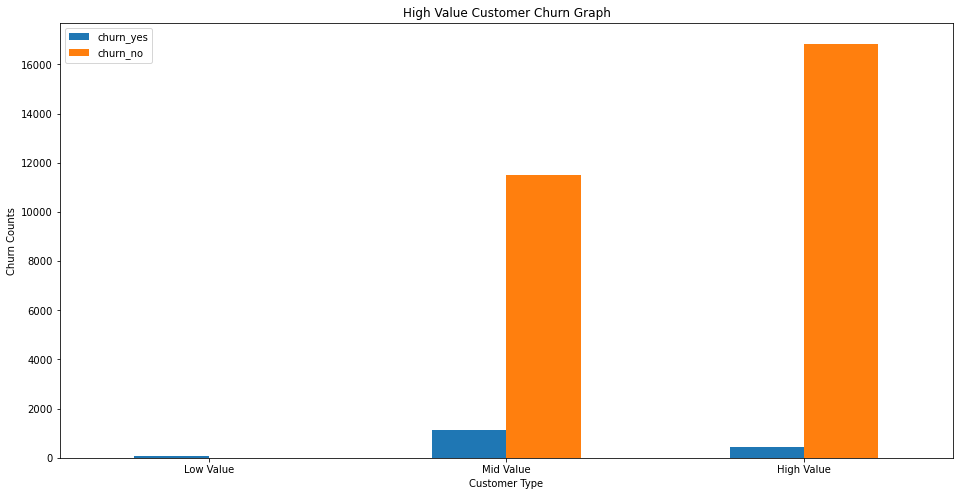

In [162]:
# Plot the graph for high value customer churn probability

bins = [-2500, 100, 500, 15000]   # The bin values are an assumption
unseen_data['total_arpu'] = unseen_data['arpu_6'] + unseen_data['arpu_7'] + unseen_data['arpu_8']
unseen_data['cust_type'] = pd.cut(x=unseen_data['total_arpu'], 
                                 bins=bins,
                                 labels=['Low Value', 'Mid Value', 'High Value'], 
                                 include_lowest=True)

unseen_data['churn_yes'] = [ 1 if x == 1 else 0 for x in unseen_data['churn_probability']]
unseen_data['churn_no'] = [ 1 if x == 0 else 0 for x in unseen_data['churn_probability']]

grouped_unseen_data = unseen_data.groupby(['cust_type'])[('churn_yes', 'churn_no')].sum()

grouped_unseen_data.plot(kind='bar', 
                         title='High Value Customer Churn Graph', 
                         ylabel='Churn Counts',
                         xlabel='Customer Type',
                         figsize=(16, 8))

plt.xticks(rotation=0)
plt.show()

In [163]:
unseen_data.groupby(['cust_type'])[('churn_yes', 'churn_no')].sum()

,churn_yes,churn_no
cust_type,,
Low Value,67,0
Mid Value,1141,11508
High Value,432,16847


#### Recommendations to reduce high value customer churn:

    1. Learn the offerings from market competitors. Offer discounts if the competitor is offering the same service at lower rate.
    2. Offer additional data to make it more lucrative for the customer to leave the network.
    3. Offer free roaming services as the use has ben reduced which can indicate that either customer is using different network or customer's travel has reduced.
    4. Provide good network quality so that there is no interruption for the local incoming calls escpecially to to high value customers.

#### Create a submission csv file as the output of this exercise

In [164]:
output.to_csv('submission.csv',index=False)

This file has been uploaded and submitted on Kaggle.